# Vanilla RNN from Scratch for Vehicle Sensor Data

This notebook implements a vanilla RNN from scratch using only NumPy to process vehicle sensor data.


In [3]:
import pandas as pd
import numpy as np


In [4]:
# Load vehicle sensor dataset
dataset_path = 'dataset/2017-07-31_Seat_Leon_RT_KA_Normal.csv'

# Load the dataset
df = pd.read_csv(dataset_path)

# Display basic information about the dataset
print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:")
print(df.columns.tolist())
print(f"\nFirst few rows:")
df.head()


Dataset loaded successfully!
Dataset shape: (57331, 11)

Column names:
['Time', 'Engine Coolant Temperature [Â°C]', 'Intake Manifold Absolute Pressure [kPa]', 'Engine RPM [RPM]', 'Vehicle Speed Sensor [km/h]', 'Intake Air Temperature [Â°C]', 'Air Flow Rate from Mass Flow Sensor [g/s]', 'Absolute Throttle Position [%]', 'Ambient Air Temperature [Â°C]', 'Accelerator Pedal Position D [%]', 'Accelerator Pedal Position E [%]']

First few rows:


,Time,Engine Coolant Temperature [Â°C],Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Intake Air Temperature [Â°C],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Ambient Air Temperature [Â°C],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%]
0,07:28:41.017,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07:28:41.107,25,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07:28:41.168,25,98.0,869.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07:28:41.258,25,98.0,869.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,07:28:41.348,25,98.0,869.0,0.0,22.0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Explore the dataset structure
print("Dataset Info:")
print(df.info())

print("\n" + "="*50)
print("Basic Statistics:")
print(df.describe())

print("\n" + "="*50)
print("Check for missing values:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")
print(f"Percentage of missing values: {(missing_values.sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

print("\n" + "="*50)
print("Data types:")
print(df.dtypes)

print("\n" + "="*50)
print("Dataset Memory Usage:")
print(f"Total memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57331 entries, 0 to 57330
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Time                                       57331 non-null  object 
 1   Engine Coolant Temperature [Â°C]           57331 non-null  int64  
 2   Intake Manifold Absolute Pressure [kPa]    57330 non-null  float64
 3   Engine RPM [RPM]                           57329 non-null  float64
 4   Vehicle Speed Sensor [km/h]                57328 non-null  float64
 5   Intake Air Temperature [Â°C]               57327 non-null  float64
 6   Air Flow Rate from Mass Flow Sensor [g/s]  57326 non-null  float64
 7   Absolute Throttle Position [%]             57325 non-null  float64
 8   Ambient Air Temperature [Â°C]              57324 non-null  float64
 9   Accelerator Pedal Position D [%]           57323 non-null  float64
 10  Accelera

In [6]:
# Select only Time, RPM, and Vehicle Speed Sensor
# Create a new table with just these two sensors along with Time
sensor_df = df[['Time', 'Engine RPM [RPM]', 'Vehicle Speed Sensor [km/h]']].copy()

# Rename columns for easier working
sensor_df.columns = ['Time', 'RPM', 'Vehicle_Speed_kmh']

# Remove rows with NaN values - keep only rows where both RPM and Vehicle_Speed_kmh have values
print(f"Original shape before removing NaN: {sensor_df.shape}")
sensor_df = sensor_df.dropna()
print(f"New shape after removing NaN: {sensor_df.shape}")
print(f"Rows removed: {57331 - len(sensor_df)}")

print("\n" + "="*50)
print("New table with Time, RPM, and Vehicle Speed Sensor (no NaN values):")
print(f"Shape: {sensor_df.shape}")
print(f"\nColumn names: {sensor_df.columns.tolist()}")
print("\nFirst 10 rows:")
print(sensor_df.head(10))

print("\n" + "="*50)
print("Basic Statistics:")
print(sensor_df.describe())

print("\n" + "="*50)
print("Missing values check:")
print(sensor_df.isnull().sum())


Original shape before removing NaN: (57331, 3)
New shape after removing NaN: (57328, 3)
Rows removed: 3

New table with Time, RPM, and Vehicle Speed Sensor (no NaN values):
Shape: (57328, 3)

Column names: ['Time', 'RPM', 'Vehicle_Speed_kmh']

First 10 rows:
            Time    RPM  Vehicle_Speed_kmh
3   07:28:41.258  869.0                0.0
4   07:28:41.348  869.0                0.0
5   07:28:41.439  869.0                0.0
6   07:28:41.528  869.0                0.0
7   07:28:41.618  869.0                0.0
8   07:28:41.708  869.0                0.0
9   07:28:41.769  869.0                0.0
10  07:28:41.858  869.0                0.0
11  07:28:41.920  869.0                0.0
12  07:28:42.008  870.0                0.0

Basic Statistics:
                RPM  Vehicle_Speed_kmh
count  57328.000000       57328.000000
mean    1617.094352          75.471148
std      611.121034          51.481013
min        0.000000           0.000000
25%     1261.000000          27.000000
50%     1643.00

In [7]:
# Check if timestamps are repeating/duplicate
print("Timestamp Duplicate Check:")
print("="*50)

total_rows = len(sensor_df)
unique_timestamps = sensor_df['Time'].nunique()
duplicate_count = total_rows - unique_timestamps

print(f"Total rows: {total_rows}")
print(f"Unique timestamps: {unique_timestamps}")
print(f"Duplicate timestamps: {duplicate_count}")

if duplicate_count > 0:
    print(f"\n⚠️ WARNING: Found {duplicate_count} duplicate timestamps!")
    print("\nShowing duplicate timestamps:")
    duplicate_times = sensor_df[sensor_df.duplicated(subset=['Time'], keep=False)]
    print(f"Number of rows with duplicate timestamps: {len(duplicate_times)}")
    print("\nFirst few duplicate timestamps:")
    print(duplicate_times.head(10))
    
    print("\nDuplicate timestamp counts (top 10):")
    timestamp_counts = sensor_df['Time'].value_counts()
    duplicates = timestamp_counts[timestamp_counts > 1]
    print(duplicates.head(10))
else:
    print("\n✓ No duplicate timestamps found. All timestamps are unique!")


Timestamp Duplicate Check:
Total rows: 57328
Unique timestamps: 57328
Duplicate timestamps: 0

✓ No duplicate timestamps found. All timestamps are unique!


## Dataset Summary

**Type:** Multivariate Time Series  
**Shape:** 57,328 timesteps × 2 features  
**Features:** RPM and Vehicle Speed  
**Timestamps:** Unique (no duplicates)  
**Missing values:** None (cleaned)

This dataset will be used to understand vanilla RNN implementation from scratch using NumPy.


In [8]:
# Normalize the sensor data
# ============================================
# WHY NORMALIZATION?
# ============================================
# 1. Different scales: RPM ranges from 0-3333, while Vehicle Speed ranges from 0-198
#    Without normalization, features with larger values dominate the learning process
# 2. Gradient stability: Neural networks (including RNNs) work better when all features
#    are on a similar scale. This prevents gradients from being too large/small for some features
# 3. Faster convergence: Normalized data helps the optimization algorithm converge faster
# 4. Numerical stability: Prevents numerical overflow/underflow during computations
#
# We'll use Min-Max normalization to scale values between 0 and 1:
# normalized_value = (value - min) / (max - min)
# ============================================

# Extract the sensor columns (excluding Time)
features = sensor_df[['RPM', 'Vehicle_Speed_kmh']].values

# Calculate min and max for each feature (column-wise)
# We'll store these so we can denormalize later if needed
feature_min = features.min(axis=0)  # Min for each feature: [RPM_min, Speed_min]
feature_max = features.max(axis=0)  # Max for each feature: [RPM_max, Speed_max]

print("Original feature ranges:")
print(f"RPM: [{feature_min[0]:.2f}, {feature_max[0]:.2f}]")
print(f"Vehicle Speed: [{feature_min[1]:.2f}, {feature_max[1]:.2f}]")

# Apply Min-Max normalization: (x - min) / (max - min)
normalized_features = (features - feature_min) / (feature_max - feature_min)

print("\n" + "="*50)
print("After normalization:")
print(f"Normalized RPM range: [{normalized_features[:, 0].min():.4f}, {normalized_features[:, 0].max():.4f}]")
print(f"Normalized Vehicle Speed range: [{normalized_features[:, 1].min():.4f}, {normalized_features[:, 1].max():.4f}]")

# Create a new dataframe with normalized values (keeping Time column)
sensor_df_normalized = sensor_df.copy()
sensor_df_normalized[['RPM', 'Vehicle_Speed_kmh']] = normalized_features

print("\n" + "="*50)
print("First 10 rows of normalized data:")
print(sensor_df_normalized.head(10))

# Store min/max for later use (to denormalize predictions if needed)
print("\n" + "="*50)
print("Saved normalization parameters:")
print(f"Feature min: {feature_min}")
print(f"Feature max: {feature_max}")


Original feature ranges:
RPM: [0.00, 3333.00]
Vehicle Speed: [0.00, 198.00]

After normalization:
Normalized RPM range: [0.0000, 1.0000]
Normalized Vehicle Speed range: [0.0000, 1.0000]

First 10 rows of normalized data:
            Time       RPM  Vehicle_Speed_kmh
3   07:28:41.258  0.260726                0.0
4   07:28:41.348  0.260726                0.0
5   07:28:41.439  0.260726                0.0
6   07:28:41.528  0.260726                0.0
7   07:28:41.618  0.260726                0.0
8   07:28:41.708  0.260726                0.0
9   07:28:41.769  0.260726                0.0
10  07:28:41.858  0.260726                0.0
11  07:28:41.920  0.260726                0.0
12  07:28:42.008  0.261026                0.0

Saved normalization parameters:
Feature min: [0. 0.]
Feature max: [3333.  198.]


In [9]:
# Split data into Train, Validation, and Test sets
# ============================================
# WHY SEQUENTIAL SPLIT (not random)?
# ============================================
# For time series data, we MUST split sequentially (chronologically), not randomly:
# 1. Prevents data leakage: Future data shouldn't influence past predictions
# 2. Realistic evaluation: Test on unseen future data (like real-world scenarios)
# 3. Preserves temporal order: RNNs learn temporal patterns, so maintaining order is crucial
# 4. No random shuffle: Random splits would mix past and future, breaking time dependencies
#
# Standard split ratios for time series:
# - Training: ~70% (to learn patterns)
# - Validation: ~15% (to tune hyperparameters)
# - Test: ~15% (to evaluate final performance)
# ============================================

# Extract normalized features (excluding Time column)
# We'll work with numpy arrays for easier indexing
data = sensor_df_normalized[['RPM', 'Vehicle_Speed_kmh']].values
total_samples = len(data)

print(f"Total samples: {total_samples}")

# Define split ratios
train_ratio = 0.70
val_ratio = 0.15
test_ratio = 0.15

# Calculate split indices
train_end = int(total_samples * train_ratio)
val_end = int(total_samples * (train_ratio + val_ratio))

# Perform sequential split
train_data = data[:train_end]
val_data = data[train_end:val_end]
test_data = data[val_end:]

print("\n" + "="*50)
print("Data Split Summary:")
print(f"Training set:   {len(train_data):,} samples ({len(train_data)/total_samples*100:.1f}%)")
print(f"Validation set: {len(val_data):,} samples ({len(val_data)/total_samples*100:.1f}%)")
print(f"Test set:       {len(test_data):,} samples ({len(test_data)/total_samples*100:.1f}%)")

print("\n" + "="*50)
print("Split indices:")
print(f"Train:   [0, {train_end})")
print(f"Val:     [{train_end}, {val_end})")
print(f"Test:    [{val_end}, {total_samples})")

print("\n" + "="*50)
print("Shape of each split:")
print(f"Train data shape:   {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Test data shape:     {test_data.shape}")

print("\n" + "="*50)
print("First few samples from each split:")
print("Training set (first 5):")
print(train_data[:5])
print("\nValidation set (first 5):")
print(val_data[:5])
print("\nTest set (first 5):")
print(test_data[:5])


Total samples: 57328

Data Split Summary:
Training set:   40,129 samples (70.0%)
Validation set: 8,599 samples (15.0%)
Test set:       8,600 samples (15.0%)

Split indices:
Train:   [0, 40129)
Val:     [40129, 48728)
Test:    [48728, 57328)

Shape of each split:
Train data shape:   (40129, 2)
Validation data shape: (8599, 2)
Test data shape:     (8600, 2)

First few samples from each split:
Training set (first 5):
[[0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.26072607 0.        ]]

Validation set (first 5):
[[0.74377438 0.73737374]
 [0.74377438 0.74242424]
 [0.74377438 0.74242424]
 [0.74377438 0.74242424]
 [0.74377438 0.74242424]]

Test set (first 5):
[[0.41584158 0.27272727]
 [0.4110411  0.27272727]
 [0.4110411  0.26767677]
 [0.4110411  0.26767677]
 [0.4110411  0.26767677]]


In [10]:
# Create Sequences/Windows for RNN
# ============================================
# WHY DO WE NEED SEQUENCES?
# ============================================
# RNNs process sequences, not single data points:
# 1. Temporal patterns: RNNs learn patterns across time by processing sequences
# 2. Context: Each prediction uses previous timesteps as context
# 3. Sequential processing: RNNs process one timestep at a time within a sequence
# 4. Memory: Hidden states carry information from past timesteps
#
# Our setup:
# - Window size: 10 timesteps (input sequence length)
# - Prediction: 1 timestep ahead (next timestep)
# - Features: 2 (RPM and Vehicle Speed)
# - Input shape: (sequence_length, num_features) = (10, 2)
# - Output shape: (num_features,) = (2,) - next timestep values
#
# FORMULA FOR NUMBER OF SEQUENCES:
# ============================================
# If we have N total data points and sequence_length = L:
#   num_sequences = N - L
#
# Explanation:
# - We need L timesteps for input + 1 timestep for target
# - Starting index can be: 0, 1, 2, ..., (N-L-1)
# - Last sequence uses indices (N-L-1) to (N-2) for input, predicts index (N-1)
# - Total sequences: (N-L-1) - 0 + 1 = N - L
#
# Example:
# - N = 100 data points, L = 10
# - num_sequences = 100 - 10 = 90 sequences
# - Sequence 0: indices [0-9] → predicts [10]
# - Sequence 89: indices [89-98] → predicts [99]
# ============================================

def create_sequences(data, sequence_length=10):
    """
    Create sliding window sequences from time series data.
    
    Args:
        data: numpy array of shape (num_samples, num_features)
        sequence_length: number of timesteps to use as input (window size)
    
    Returns:
        X: input sequences of shape (num_sequences, sequence_length, num_features)
        y: target values of shape (num_sequences, num_features)
    """
    X, y = [], []
    
    # For each possible starting point
    for i in range(len(data) - sequence_length):
        # Input: sequence_length consecutive timesteps
        X.append(data[i:i + sequence_length])
        # Output: next single timestep
        y.append(data[i + sequence_length])
    
    return np.array(X), np.array(y)

# Set window/sequence length
sequence_length = 10

print(f"Creating sequences with window size: {sequence_length}")
print(f"Predicting: 1 timestep ahead\n")

# Create sequences for each split
X_train, y_train = create_sequences(train_data, sequence_length)
X_val, y_val = create_sequences(val_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

print("="*50)
print("Sequence Shapes:")
print(f"X_train shape: {X_train.shape}  → (num_sequences, sequence_length, num_features)")
print(f"y_train shape: {y_train.shape}  → (num_sequences, num_features)")
print(f"\nX_val shape:   {X_val.shape}")
print(f"y_val shape:   {y_val.shape}")
print(f"\nX_test shape:  {X_test.shape}")
print(f"y_test shape:  {y_test.shape}")

print("\n" + "="*50)
print("Understanding the shapes:")
print(f"- Each sequence has {sequence_length} timesteps")
print(f"- Each timestep has {X_train.shape[2]} features (RPM, Vehicle Speed)")
print(f"- Each target has {y_train.shape[1]} values (next RPM, next Vehicle Speed)")

print("\n" + "="*50)
print("Example: First training sequence")
print(f"Input (X_train[0]) - shape {X_train[0].shape}:")
print(X_train[0])
print(f"\nTarget (y_train[0]) - shape {y_train[0].shape}:")
print(y_train[0])
print(f"\nInterpretation: Given 10 timesteps of data, predict timestep 11")


Creating sequences with window size: 10
Predicting: 1 timestep ahead

Sequence Shapes:
X_train shape: (40119, 10, 2)  → (num_sequences, sequence_length, num_features)
y_train shape: (40119, 2)  → (num_sequences, num_features)

X_val shape:   (8589, 10, 2)
y_val shape:   (8589, 2)

X_test shape:  (8590, 10, 2)
y_test shape:  (8590, 2)

Understanding the shapes:
- Each sequence has 10 timesteps
- Each timestep has 2 features (RPM, Vehicle Speed)
- Each target has 2 values (next RPM, next Vehicle Speed)

Example: First training sequence
Input (X_train[0]) - shape (10, 2):
[[0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.2610261  0.        ]]

Target (y_train[0]) - shape (2,):
[0.2610261 0.       ]

Interpretation: Given 10 timesteps of data, predict timestep 11


# Understanding Vanilla RNN Architecture

## What is a Vanilla RNN?

A **Vanilla RNN** (also called a Simple RNN) is the most basic type of Recurrent Neural Network. Unlike feedforward neural networks, RNNs have **memory** - they can use information from previous timesteps to make predictions at the current timestep.

## Key Concept: Hidden State (Memory)

The most important concept in RNNs is the **hidden state** (`h_t`). Think of it as the RNN's "memory" - it carries information from all previous timesteps forward through time.

- `h_0`: Initial hidden state (usually zeros or randomly initialized)
- `h_t`: Hidden state at timestep `t`
- `h_{t-1}`: Previous hidden state (from timestep `t-1`)

## Basic Structure

At each timestep `t`, a vanilla RNN:
1. Takes **input** `x_t` (current timestep data)
2. Combines it with **previous hidden state** `h_{t-1}` (memory)
3. Computes **new hidden state** `h_t`
4. Produces **output** `y_t` (prediction)

```
Timestep t:
    Input: x_t (e.g., [RPM, Speed] at time t)
    Previous Memory: h_{t-1}
    ↓
    RNN Cell
    ↓
    New Memory: h_t
    Output: y_t (prediction for next timestep)
```

## The Core Equations

### 1. Hidden State Update
```
h_t = tanh(W_hh · h_{t-1} + W_xh · x_t + b_h)
```

**Breaking it down:**
- `W_hh`: Weight matrix connecting hidden state to hidden state (maintains memory)
- `W_xh`: Weight matrix connecting input to hidden state (processes current input)
- `b_h`: Bias term for hidden state
- `tanh`: Activation function (squashes values to [-1, 1])

**What it means:**
- Combines information from previous timestep (`W_hh · h_{t-1}`) with current input (`W_xh · x_t`)
- Creates new memory/context that includes both past and present information

### 2. Output Computation
```
y_t = W_hy · h_t + b_y
```

**Breaking it down:**
- `W_hy`: Weight matrix connecting hidden state to output
- `b_y`: Bias term for output
- `y_t`: Prediction/output at timestep `t`

**Note:** For regression tasks, we often don't use an activation function on the output.

## Information Flow Through Time

Let's see how a sequence of length 10 is processed:

```
Timestep 0: x_0 → RNN → h_0 → y_0
            ↓
Timestep 1: x_1 + h_0 → RNN → h_1 → y_1
            ↓
Timestep 2: x_2 + h_1 → RNN → h_2 → y_2
            ↓
...
Timestep 9: x_9 + h_8 → RNN → h_9 → y_9
```

**Key insight:** Each hidden state `h_t` contains information from ALL previous timesteps (0, 1, 2, ..., t).

## Components We Need to Implement

1. **Weight matrices:**
   - `W_hh`: Shape (hidden_size, hidden_size)
   - `W_xh`: Shape (input_size, hidden_size)
   - `W_hy`: Shape (hidden_size, output_size)

2. **Bias vectors:**
   - `b_h`: Shape (hidden_size,)
   - `b_y`: Shape (output_size,)

3. **Hidden state:**
   - `h_t`: Shape (hidden_size,) at each timestep

4. **Forward pass:**
   - Process entire sequence timestep by timestep
   - Update hidden state at each step
   - Compute outputs at each step

## Our Specific Setup

- **Input size (input_size):** 2 (RPM and Vehicle Speed)
- **Hidden size (hidden_size):** We'll choose this (e.g., 32, 64, etc.)
- **Output size (output_size):** 2 (predicting next RPM and Vehicle Speed)
- **Sequence length:** 10 timesteps

## Next Steps

We'll implement this step by step:
1. Initialize weights and biases
2. Implement forward pass for single timestep
3. Implement forward pass for entire sequence
4. Test with our data


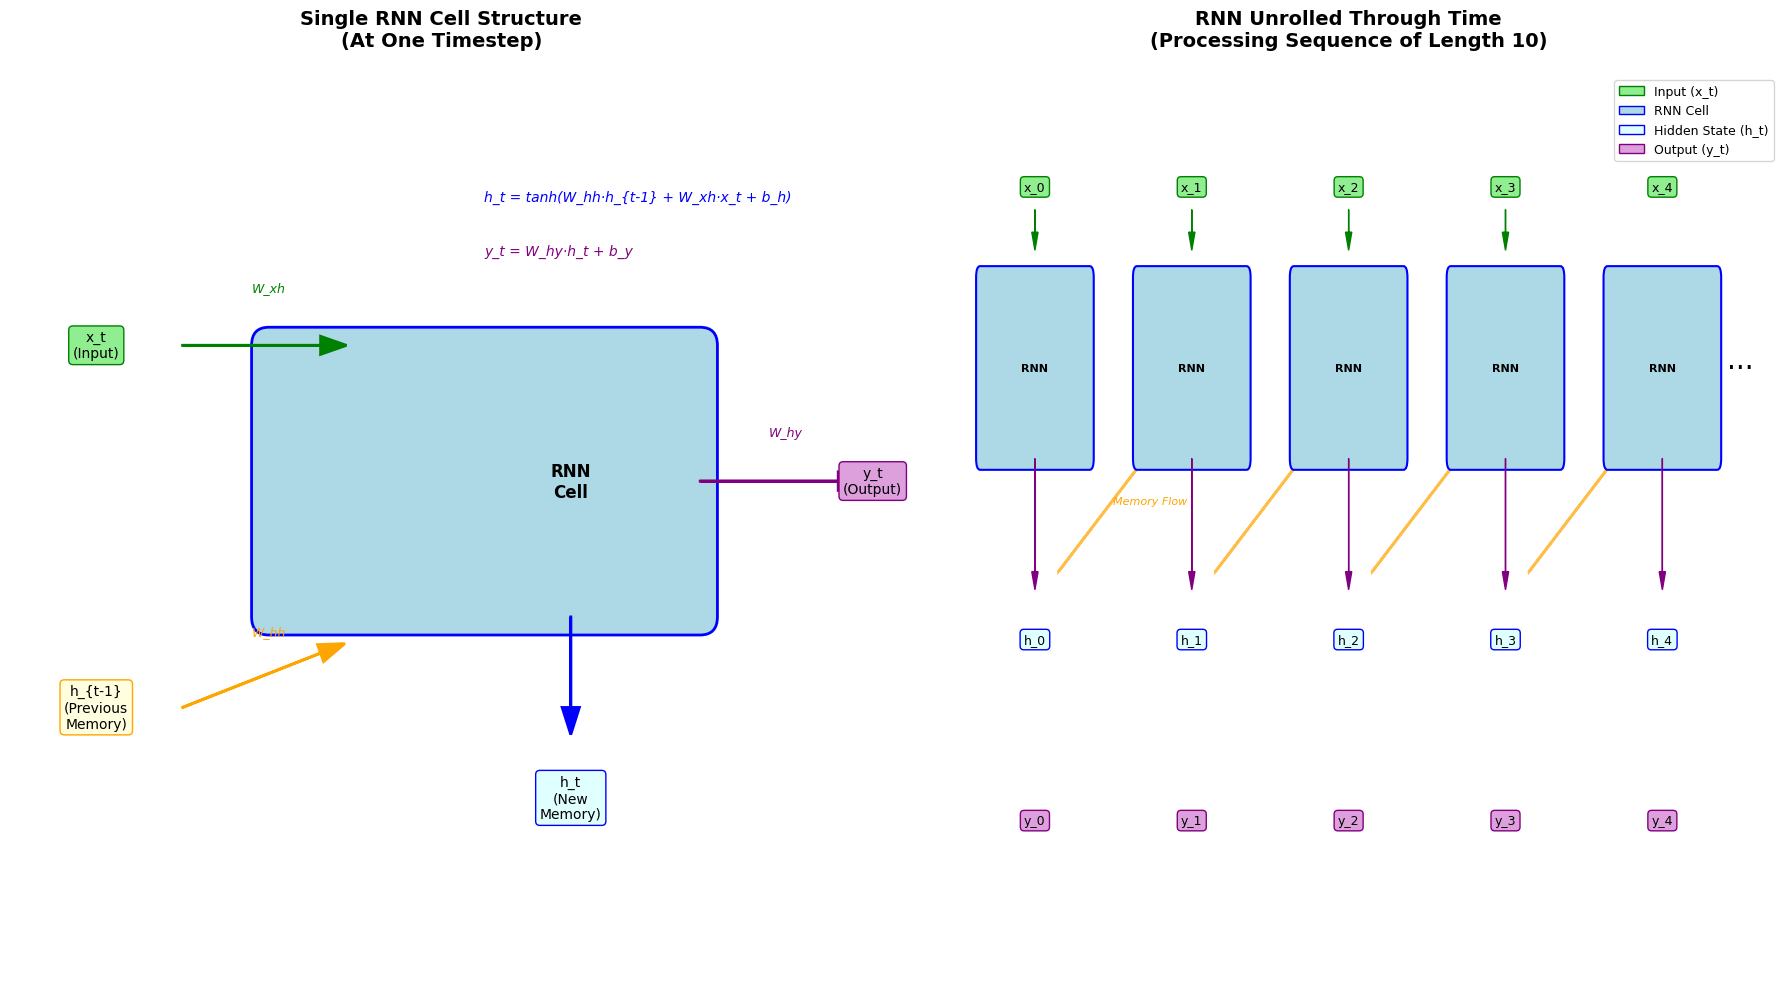


KEY INSIGHTS FROM THE VISUALIZATION:

1. SINGLE CELL (Left):
   - At each timestep, RNN takes: Input (x_t) + Previous Memory (h_{t-1})
   - Processes them through weights W_xh and W_hh
   - Produces: New Memory (h_t) + Output (y_t)

2. UNROLLED (Right):
   - Shows how RNN processes a sequence timestep by timestep
   - Memory (hidden state) flows horizontally from one timestep to next
   - Each hidden state contains information from ALL previous timesteps
   - Output at each timestep depends on current input AND all past inputs

3. MEMORY FLOW:
   - h_0 → h_1 → h_2 → ... → h_9
   - Each h_t carries information from timesteps 0, 1, 2, ..., t
   - This is how RNNs 'remember' past information!


In [11]:
# Visualization of Vanilla RNN Architecture
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Circle

# Create visualization of RNN structure
fig = plt.figure(figsize=(18, 10))

# Part 1: Single RNN Cell Structure (Left side)
ax1 = plt.subplot(1, 2, 1)
ax1.set_xlim(-0.5, 4.5)
ax1.set_ylim(-0.5, 4.5)
ax1.axis('off')
ax1.set_title('Single RNN Cell Structure\n(At One Timestep)', fontsize=14, fontweight='bold', pad=20)

# RNN Cell box
cell_box = FancyBboxPatch((1, 1.5), 2.5, 1.5, boxstyle="round,pad=0.1", 
                          edgecolor='blue', facecolor='lightblue', linewidth=2)
ax1.add_patch(cell_box)
ax1.text(2.75, 2.25, 'RNN\nCell', ha='center', va='center', fontsize=12, fontweight='bold')

# Input x_t
ax1.text(0, 3, 'x_t\n(Input)', ha='center', va='center', fontsize=10, 
         bbox=dict(boxstyle='round', facecolor='lightgreen', edgecolor='green'))
ax1.arrow(0.5, 3, 0.8, 0, head_width=0.1, head_length=0.15, fc='green', ec='green', linewidth=2)
ax1.text(0.9, 3.3, 'W_xh', fontsize=9, style='italic', color='green')

# Previous hidden state h_{t-1}
ax1.text(0, 1, 'h_{t-1}\n(Previous\nMemory)', ha='center', va='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='orange'))
ax1.arrow(0.5, 1, 0.8, 0.3, head_width=0.1, head_length=0.15, fc='orange', ec='orange', linewidth=2)
ax1.text(0.9, 1.4, 'W_hh', fontsize=9, style='italic', color='orange')

# Output y_t
ax1.arrow(3.5, 2.25, 0.8, 0, head_width=0.1, head_length=0.15, fc='purple', ec='purple', linewidth=2)
ax1.text(3.9, 2.5, 'W_hy', fontsize=9, style='italic', color='purple')
ax1.text(4.5, 2.25, 'y_t\n(Output)', ha='center', va='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='plum', edgecolor='purple'))

# New hidden state h_t
ax1.arrow(2.75, 1.5, 0, -0.5, head_width=0.1, head_length=0.15, fc='blue', ec='blue', linewidth=2)
ax1.text(2.75, 0.5, 'h_t\n(New\nMemory)', ha='center', va='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='lightcyan', edgecolor='blue'))

# Equations
ax1.text(2.25, 3.8, 'h_t = tanh(W_hh·h_{t-1} + W_xh·x_t + b_h)', 
         fontsize=10, style='italic', color='blue')
ax1.text(2.25, 3.5, 'y_t = W_hy·h_t + b_y', 
         fontsize=10, style='italic', color='purple')

# Part 2: Unrolled RNN Through Time (Right side)
ax2 = plt.subplot(1, 2, 2)
ax2.set_xlim(-0.5, 10.5)
ax2.set_ylim(-0.5, 3.5)
ax2.axis('off')
ax2.set_title('RNN Unrolled Through Time\n(Processing Sequence of Length 10)', fontsize=14, fontweight='bold', pad=20)

# Show 5 timesteps for clarity
timesteps = [0, 1, 2, 3, 4]
x_positions = [1, 3, 5, 7, 9]

for i, (t, x_pos) in enumerate(zip(timesteps, x_positions)):
    # Input
    ax2.text(x_pos, 3, f'x_{t}', ha='center', va='center', fontsize=9,
             bbox=dict(boxstyle='round', facecolor='lightgreen', edgecolor='green'))
    
    # RNN Cell
    cell = FancyBboxPatch((x_pos-0.7, 1.8), 1.4, 0.8, boxstyle="round,pad=0.05",
                          edgecolor='blue', facecolor='lightblue', linewidth=1.5)
    ax2.add_patch(cell)
    ax2.text(x_pos, 2.2, 'RNN', ha='center', va='center', fontsize=8, fontweight='bold')
    
    # Hidden state
    ax2.text(x_pos, 1, f'h_{t}', ha='center', va='center', fontsize=9,
             bbox=dict(boxstyle='round', facecolor='lightcyan', edgecolor='blue'))
    
    # Output
    ax2.text(x_pos, 0.2, f'y_{t}', ha='center', va='center', fontsize=9,
             bbox=dict(boxstyle='round', facecolor='plum', edgecolor='purple'))
    
    # Arrows from input to RNN
    if t < 4:
        ax2.arrow(x_pos, 2.9, 0, -0.1, head_width=0.08, head_length=0.08, fc='green', ec='green')
    
    # Arrows from RNN to output
    ax2.arrow(x_pos, 1.8, 0, -0.5, head_width=0.08, head_length=0.08, fc='purple', ec='purple')
    
    # Horizontal arrows showing memory flow
    if t < 4:
        # From h_t to next timestep's RNN
        ax2.arrow(x_pos+0.3, 1.3, 1.1, 0.5, head_width=0.08, head_length=0.15, 
                  fc='orange', ec='orange', linewidth=2, alpha=0.7)
        if t == 0:
            ax2.text(x_pos+1, 1.6, 'Memory Flow', fontsize=8, style='italic', color='orange')

# Add "..."
ax2.text(10, 2.2, '...', fontsize=20, ha='center')

# Add legend
legend_elements = [
    plt.Rectangle((0,0),1,1, facecolor='lightgreen', edgecolor='green', label='Input (x_t)'),
    plt.Rectangle((0,0),1,1, facecolor='lightblue', edgecolor='blue', label='RNN Cell'),
    plt.Rectangle((0,0),1,1, facecolor='lightcyan', edgecolor='blue', label='Hidden State (h_t)'),
    plt.Rectangle((0,0),1,1, facecolor='plum', edgecolor='purple', label='Output (y_t)'),
]
ax2.legend(handles=legend_elements, loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()

# Additional text explanation
print("\n" + "="*70)
print("KEY INSIGHTS FROM THE VISUALIZATION:")
print("="*70)
print("\n1. SINGLE CELL (Left):")
print("   - At each timestep, RNN takes: Input (x_t) + Previous Memory (h_{t-1})")
print("   - Processes them through weights W_xh and W_hh")
print("   - Produces: New Memory (h_t) + Output (y_t)")
print("\n2. UNROLLED (Right):")
print("   - Shows how RNN processes a sequence timestep by timestep")
print("   - Memory (hidden state) flows horizontally from one timestep to next")
print("   - Each hidden state contains information from ALL previous timesteps")
print("   - Output at each timestep depends on current input AND all past inputs")
print("\n3. MEMORY FLOW:")
print("   - h_0 → h_1 → h_2 → ... → h_9")
print("   - Each h_t carries information from timesteps 0, 1, 2, ..., t")
print("   - This is how RNNs 'remember' past information!")
print("="*70)


In [12]:
# Initialize Weights and Biases for Vanilla RNN
# ============================================
# WHY INITIALIZATION MATTERS:
# ============================================
# 1. SYMMETRY BREAKING:
#    - If all weights start with same values, all neurons learn the same thing
#    - Random initialization ensures each neuron learns different features
#    - This diversity helps the network learn complex patterns
#
# 2. GRADIENT FLOW:
#    - Too small weights → vanishing gradients (gradients become too small)
#    - Too large weights → exploding gradients (gradients become too large)
#    - Proper initialization keeps gradients in a healthy range
#
# 3. TRAINING STABILITY:
#    - Good initialization → faster convergence, stable training
#    - Bad initialization → slow learning, unstable training, or no learning at all
#
# INITIALIZATION STRATEGIES:
# ============================================
# For WEIGHTS (matrices):
# - Small random values around zero work best for RNNs
# - Common approaches:
#   1. Normal distribution: W ~ N(0, std²) where std = 0.01 or 1/sqrt(hidden_size)
#   2. Uniform distribution: W ~ U(-0.1, 0.1) or U(-1/sqrt(hidden_size), 1/sqrt(hidden_size))
# - RNNs are sensitive, so we use SMALLER values than feedforward networks
#
# For BIASES (vectors):
# - Usually initialized to ZERO
# - Sometimes small positive values for hidden bias can help (e.g., 0.1)
# - Output bias can also be set to mean of target values (if known)
#
# We'll use: Normal distribution with std = 0.01 for weights, zeros for biases
# ============================================

# Define RNN architecture parameters
input_size = 2      # Number of input features (RPM, Vehicle Speed)
hidden_size = 32    # Number of hidden units (we'll start with 32)
output_size = 2     # Number of output features (predicting RPM and Speed)

print("RNN Architecture:")
print("="*50)
print(f"Input size (input_size):  {input_size}  → (RPM, Vehicle Speed)")
print(f"Hidden size (hidden_size): {hidden_size} → (number of memory units)")
print(f"Output size (output_size): {output_size} → (predicted RPM, Speed)")

# Initialize WEIGHTS using small random values (Normal distribution)
# ============================================
# W_hh: Hidden-to-hidden weights (maintains memory)
#       Shape: (hidden_size, hidden_size)
#       Purpose: Combines previous hidden state h_{t-1} with current computation
W_hh = np.random.normal(0, 0.01, (hidden_size, hidden_size))

# W_xh: Input-to-hidden weights (processes current input)
#       Shape: (input_size, hidden_size)
#       Purpose: Transforms current input x_t to hidden space
W_xh = np.random.normal(0, 0.01, (input_size, hidden_size))

# W_hy: Hidden-to-output weights (produces predictions)
#       Shape: (hidden_size, output_size)
#       Purpose: Transforms hidden state h_t to output y_t
W_hy = np.random.normal(0, 0.01, (hidden_size, output_size))

print("\n" + "="*50)
print("Weight Matrices Initialized:")
print(f"W_hh shape: {W_hh.shape}  → Connects hidden state to hidden state")
print(f"W_xh shape: {W_xh.shape}  → Connects input to hidden state")
print(f"W_hy shape: {W_hy.shape}  → Connects hidden state to output")

# WHY CALCULATE WEIGHT STATISTICS?
# Weight statistics (mean, std, min, max) help us verify that initialization worked correctly.
# They act as a sanity check: we can confirm values are small (std ~0.01), centered around zero
# (mean ~0), and have no extreme outliers. This helps catch initialization bugs early and gives
# us confidence that training will start from a good initial state. For learning purposes, it also
# helps us see what initialization actually produces in practice.
print("\nWeight Statistics:")
print(f"W_hh - Mean: {W_hh.mean():.6f}, Std: {W_hh.std():.6f}, Min: {W_hh.min():.6f}, Max: {W_hh.max():.6f}")
print(f"W_xh - Mean: {W_xh.mean():.6f}, Std: {W_xh.std():.6f}, Min: {W_xh.min():.6f}, Max: {W_xh.max():.6f}")
print(f"W_hy - Mean: {W_hy.mean():.6f}, Std: {W_hy.std():.6f}, Min: {W_hy.min():.6f}, Max: {W_hy.max():.6f}")

# Initialize BIASES using zeros
# ============================================
# b_h: Hidden state bias
#      Shape: (hidden_size,)
#      Purpose: Adds constant offset to hidden state computation
b_h = np.zeros((hidden_size,))

# b_y: Output bias
#      Shape: (output_size,)
#      Purpose: Adds constant offset to output computation
b_y = np.zeros((output_size,))

print("\n" + "="*50)
print("Bias Vectors Initialized:")
print(f"b_h shape: {b_h.shape}  → Hidden state bias")
print(f"b_y shape: {b_y.shape}  → Output bias")

print("\nBias Statistics:")
print(f"b_h - Mean: {b_h.mean():.6f}, Values: {b_h[:5]}... (all zeros)")
print(f"b_y - Mean: {b_y.mean():.6f}, Values: {b_y}")

# Visualize why initialization matters
print("\n" + "="*50)
print("DEMONSTRATION: Why Initialization Matters")
print("="*50)

# Show example of what happens with different initializations
print("\n1. Our initialization (std=0.01):")
print(f"   - Weights are small: ~{W_hh.std():.4f}")
print(f"   - Will allow gradients to flow properly")
print(f"   - Each neuron starts with slightly different values (breaks symmetry)")

# Example of bad initialization - too large
W_bad = np.random.normal(0, 1.0, (hidden_size, hidden_size))
print(f"\n2. Bad initialization (std=1.0, too large):")
print(f"   - Weights are large: ~{W_bad.std():.4f}")
print(f"   - Could cause exploding gradients (values become too large)")
print(f"   - Training becomes unstable")

# Example of bad initialization - too small
W_bad2 = np.random.normal(0, 0.0001, (hidden_size, hidden_size))
print(f"\n3. Bad initialization (std=0.0001, too small):")
print(f"   - Weights are tiny: ~{W_bad2.std():.6f}")
print(f"   - Could cause vanishing gradients (values become too small)")
print(f"   - Network might not learn (or learns very slowly)")

print("\n" + "="*50)
print("✓ Initialization Complete!")
print("="*50)
print("\nWe now have:")
print("  - Weight matrices: W_hh, W_xh, W_hy")
print("  - Bias vectors: b_h, b_y")
print("  - All ready for forward pass implementation!")


RNN Architecture:
Input size (input_size):  2  → (RPM, Vehicle Speed)
Hidden size (hidden_size): 32 → (number of memory units)
Output size (output_size): 2 → (predicted RPM, Speed)

Weight Matrices Initialized:
W_hh shape: (32, 32)  → Connects hidden state to hidden state
W_xh shape: (2, 32)  → Connects input to hidden state
W_hy shape: (32, 2)  → Connects hidden state to output

Weight Statistics:
W_hh - Mean: 0.000306, Std: 0.010255, Min: -0.032579, Max: 0.033415
W_xh - Mean: 0.001009, Std: 0.009072, Min: -0.024399, Max: 0.025146
W_hy - Mean: 0.000496, Std: 0.011628, Min: -0.022620, Max: 0.023487

Bias Vectors Initialized:
b_h shape: (32,)  → Hidden state bias
b_y shape: (2,)  → Output bias

Bias Statistics:
b_h - Mean: 0.000000, Values: [0. 0. 0. 0. 0.]... (all zeros)
b_y - Mean: 0.000000, Values: [0. 0.]

DEMONSTRATION: Why Initialization Matters

1. Our initialization (std=0.01):
   - Weights are small: ~0.0103
   - Will allow gradients to flow properly
   - Each neuron starts wit

# Understanding Hidden Size

## What is Hidden Size?

**Hidden size** is the **dimension (size) of the hidden state vector** `h_t`. Think of it as the number of "memory slots" the RNN has to store information.

- `h_t` is a vector of size `hidden_size`
- Each dimension can learn to capture different patterns or features
- More dimensions = more capacity to remember different things simultaneously

### Analogy
Think of hidden size like a filing cabinet:
- **Hidden size = 32** → 32 drawers (each can store different information)
- **Hidden size = 64** → 64 drawers (more capacity, but takes more space)
- **Hidden size = 16** → 16 drawers (less capacity, but faster and simpler)

## What Does Each Dimension Represent?

Each dimension in the hidden state learns to capture different patterns during training:
- **Dimension 1** might learn: "Is RPM currently increasing?"
- **Dimension 2** might learn: "Is Speed above average?"
- **Dimension 3** might learn: "What's the correlation between RPM and Speed?"
- **Dimension 4** might learn: "What's the rate of change in RPM?"
- ... and so on

The model automatically learns what each dimension should represent based on the data.

## How Hidden Size Affects the Model

### Larger Hidden Size (e.g., 64, 128, 256)
**Pros:**
- ✅ More capacity to learn complex patterns
- ✅ Can remember more information
- ✅ Better for complex tasks

**Cons:**
- ❌ More parameters (more weights to train)
- ❌ Slower training
- ❌ More memory needed
- ❌ Risk of overfitting if too large

### Smaller Hidden Size (e.g., 8, 16, 32)
**Pros:**
- ✅ Fewer parameters (faster training)
- ✅ Less memory needed
- ✅ Simpler model (easier to understand/debug)
- ✅ Less risk of overfitting

**Cons:**
- ❌ Less capacity (might miss complex patterns)
- ❌ Might not learn all patterns in the data
- ❌ Risk of underfitting if too small

## Why We Chose Hidden Size = 32?

We chose **32** as a good starting point because:
1. **Balance**: Good balance between capacity and complexity
2. **Learning**: Not too large to understand, not too small to be ineffective
3. **Standard**: Common choice for many problems (works well)
4. **Manageable**: Easy to work with and debug

**We can always experiment!** Common values:
- **Small**: 16, 32, 64
- **Medium**: 128, 256
- **Large**: 512, 1024 (for very complex problems)

For learning vanilla RNNs and this dataset (2 features), **32 is perfect**.

## How Hidden Size Appears in Our Model

Hidden size affects the shapes of all our weight matrices:
- **W_hh**: (hidden_size, hidden_size) = (32, 32)
- **W_xh**: (input_size, hidden_size) = (2, 32)
- **W_hy**: (hidden_size, output_size) = (32, 2)
- **h_t**: (hidden_size,) = (32,)
- **b_h**: (hidden_size,) = (32,)

The **32** appears everywhere because it's the size of our memory vector!

## Key Takeaway

**Hidden size = 32** means:
- The RNN has a **32-dimensional memory vector**
- Each dimension learns to capture different patterns
- It's a hyperparameter (we choose it, model learns how to use it)
- It balances between capacity and complexity


In [13]:
# Test Forward Pass: Processing First Window (Sequence) Step-by-Step
# ============================================
# GOAL: See exactly what calculations happen when processing the FIRST WINDOW
# A window/sequence has 10 timesteps. We'll process each timestep one by one
# and show the actual calculations happening.
# ============================================

# Set numpy print options to show full arrays
np.set_printoptions(threshold=np.inf, linewidth=100, precision=6)

print("="*70)
print("PROCESSING FIRST WINDOW (SEQUENCE) - STEP BY STEP")
print("="*70)
print("\nA window/sequence contains 10 timesteps.")
print("We'll process each timestep and show what happens at each step.\n")

# Get the first window/sequence from training data
# X_train[0] is shape (10, 2) - a sequence of 10 timesteps, each with 2 features
first_window = X_train[0]  # Shape: (10, 2)
target_value = y_train[0]   # Shape: (2,) - the actual target for this sequence

print(f"First window shape: {first_window.shape} → 10 timesteps × 2 features")
print(f"Each timestep has: [RPM_normalized, Vehicle_Speed_normalized]")
print(f"\nFirst window (all 10 timesteps):")
print(first_window)
print(f"\nTarget value (what we should predict): {target_value}")
print("="*70)

# Initialize hidden state for the first timestep
h_prev = np.zeros((hidden_size,))  # Start with zeros

print("\n" + "="*70)
print("INITIAL STATE")
print("="*70)
print(f"Initial hidden state h_0: shape {h_prev.shape}")
print(f"  (All zeros - no memory yet)")
print(f"  Full array: {h_prev}")
print("="*70)

# Process each timestep in the window
all_hidden_states = []  # Store hidden states
all_outputs = []        # Store outputs at each timestep

print("\n" + "="*70)
print("PROCESSING EACH TIMESTEP IN THE WINDOW")
print("="*70)

for t in range(len(first_window)):
    print("\n" + "-"*70)
    print(f"TIMESTEP {t} / {len(first_window)-1}")
    print("-"*70)
    
    # Get input at current timestep
    x_t = first_window[t]  # Shape: (2,)
    
    print(f"\n1. INPUT at timestep {t}:")
    print(f"   x_t = {x_t}")
    print(f"   Interpretation: [RPM={x_t[0]:.6f}, Speed={x_t[1]:.6f}]")
    
    print(f"\n2. PREVIOUS HIDDEN STATE:")
    print(f"   h_{t} shape: {h_prev.shape}")
    print(f"   Full array: {h_prev}")
    
    # Manual calculation step by step to show what's happening
    print(f"\n3. CALCULATIONS:")
    
    # Step 3a: Memory component
    W_hh_h = np.dot(W_hh, h_prev)
    print(f"   a) Memory component: W_hh @ h_{t}")
    print(f"      = ({W_hh.shape}) @ ({h_prev.shape})")
    print(f"      Full result: {W_hh_h}")
    
    # Step 3b: Input component
    W_xh_x = np.dot(x_t, W_xh)
    print(f"\n   b) Input component: x_t @ W_xh")
    print(f"      = ({x_t.shape}) @ ({W_xh.shape})")
    print(f"      Full result: {W_xh_x}")
    
    # Step 3c: Combine
    h_pre_activation = W_hh_h + W_xh_x + b_h
    print(f"\n   c) Combine (before activation):")
    print(f"      = W_hh @ h_{t} + x_t @ W_xh + b_h")
    print(f"      Full result: {h_pre_activation}")
    print(f"      Min: {h_pre_activation.min():.6f}, Max: {h_pre_activation.max():.6f}")
    
    # Step 3d: Apply tanh
    h_t = np.tanh(h_pre_activation)
    print(f"\n   d) Apply tanh activation:")
    print(f"      h_{t+1} = tanh(combined)")
    print(f"      Full result: {h_t}")
    print(f"      Range: [{h_t.min():.6f}, {h_t.max():.6f}]")
    
    # Step 3e: Compute output
    y_t = np.dot(h_t, W_hy) + b_y
    print(f"\n   e) Compute output:")
    print(f"      y_{t} = h_{t+1} @ W_hy + b_y")
    print(f"      = ({h_t.shape}) @ ({W_hy.shape}) + ({b_y.shape})")
    print(f"      y_{t} = {y_t}")
    print(f"      Interpretation: [predicted_RPM={y_t[0]:.6f}, predicted_Speed={y_t[1]:.6f}]")
    
    # Store for later
    all_hidden_states.append(h_t.copy())
    all_outputs.append(y_t.copy())
    
    # Update for next iteration
    h_prev = h_t
    
    print(f"\n   → Hidden state updated: h_{t} → h_{t+1}")
    print(f"   → Output generated: y_{t}")

# Summary
print("\n" + "="*70)
print("SUMMARY: PROCESSING FIRST WINDOW")
print("="*70)
print(f"Processed {len(first_window)} timesteps")
print(f"\nHidden states generated: {len(all_hidden_states)}")
print(f"  Each has shape: {all_hidden_states[0].shape}")
print(f"\nOutputs generated: {len(all_outputs)}")
print(f"  Each has shape: {all_outputs[0].shape}")

print(f"\n" + "-"*70)
print("KEY INSIGHT:")
print("-"*70)
print("For sequence prediction, we typically use the OUTPUT from the LAST timestep")
print(f"  Last output (y_9): {all_outputs[-1]}")
print(f"  Target value:      {target_value}")
print(f"  Difference:        {all_outputs[-1] - target_value}")
print(f"\nThis is the RNN's prediction for timestep 10 (next timestep after the window).")
print("After training, this prediction will get closer to the actual target!")
print("="*70)


PROCESSING FIRST WINDOW (SEQUENCE) - STEP BY STEP

A window/sequence contains 10 timesteps.
We'll process each timestep and show what happens at each step.

First window shape: (10, 2) → 10 timesteps × 2 features
Each timestep has: [RPM_normalized, Vehicle_Speed_normalized]

First window (all 10 timesteps):
[[0.260726 0.      ]
 [0.260726 0.      ]
 [0.260726 0.      ]
 [0.260726 0.      ]
 [0.260726 0.      ]
 [0.260726 0.      ]
 [0.260726 0.      ]
 [0.260726 0.      ]
 [0.260726 0.      ]
 [0.261026 0.      ]]

Target value (what we should predict): [0.261026 0.      ]

INITIAL STATE
Initial hidden state h_0: shape (32,)
  (All zeros - no memory yet)
  Full array: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

PROCESSING EACH TIMESTEP IN THE WINDOW

----------------------------------------------------------------------
TIMESTEP 0 / 9
----------------------------------------------------------------------

1. INPUT at timestep 0:
  

## Understanding What We Just Did: Forward Pass Analysis

After processing the first window, let's understand what we got and why it matters.


In [14]:
# Analyze the Forward Pass Results
# ============================================
# After processing the first window through the forward pass,
# we need to understand what we got and what it means.
# ============================================

print("="*70)
print("WHAT DID THE FORWARD PASS PRODUCE?")
print("="*70)

print("\n1. HIDDEN STATES:")
print(f"   - We generated {len(all_hidden_states)} hidden states (one per timestep)")
print(f"   - Each hidden state shape: {all_hidden_states[0].shape}")
print(f"   - Hidden state h_0 (initial): {all_hidden_states[0][:5]}...")
print(f"   - Hidden state h_9 (final):  {all_hidden_states[-1][:5]}...")

print("\n2. OUTPUTS:")
print(f"   - We generated {len(all_outputs)} outputs (one per timestep)")
print(f"   - Each output shape: {all_outputs[0].shape}")
print(f"   - Output y_0 (first timestep):  {all_outputs[0]}")
print(f"   - Output y_9 (last timestep):   {all_outputs[-1]}")

print("\n" + "="*70)
print("KEY QUESTION: Which output should we use?")
print("="*70)

print("\nFor SEQUENCE PREDICTION (predicting the next timestep),")
print("we use the OUTPUT from the LAST timestep of the window.")
print("\nWhy?")
print("  - The last timestep has seen all previous timesteps in the window")
print("  - It has the most context (information from all 10 timesteps)")
print("  - It represents the RNN's 'best guess' based on the entire sequence")

prediction = all_outputs[-1]  # Output from last timestep
actual_target = target_value

print(f"\n" + "-"*70)
print("PREDICTION vs ACTUAL TARGET")
print("-"*70)
print(f"RNN Prediction (y_9):     {prediction}")
print(f"Actual Target:             {actual_target}")
print(f"Difference (Error):       {prediction - actual_target}")
print(f"Absolute Error:            {np.abs(prediction - actual_target)}")
print(f"Mean Absolute Error:     {np.mean(np.abs(prediction - actual_target)):.6f}")

print("\n" + "="*70)
print("WHAT DOES THIS MEAN?")
print("="*70)
print("\n1. The RNN made a PREDICTION:")
print(f"   - Predicted RPM:   {prediction[0]:.6f}")
print(f"   - Predicted Speed: {prediction[1]:.6f}")
print("\n2. We have the ACTUAL values:")
print(f"   - Actual RPM:   {actual_target[0]:.6f}")
print(f"   - Actual Speed: {actual_target[1]:.6f}")
print("\n3. The difference is the ERROR:")
print(f"   - Error in RPM:   {prediction[0] - actual_target[0]:.6f}")
print(f"   - Error in Speed: {prediction[1] - actual_target[1]:.6f}")

print("\n" + "="*70)
print("WHY IS THE ERROR LARGE?")
print("="*70)
print("\nThe weights are RANDOMLY initialized!")
print("  - The model hasn't learned anything yet")
print("  - It's just making random guesses")
print("  - This is NORMAL and EXPECTED at the start")

print("\nThis is where TRAINING comes in:")
print("  - We'll measure this error (called LOSS)")
print("  - We'll calculate how to adjust weights to reduce error")
print("  - We'll repeat this many times until predictions improve")

print("\n" + "="*70)
print("NEXT STEP: Calculate Loss")
print("="*70)
print("\nLoss tells us HOW WRONG our prediction is.")
print("We'll use Mean Squared Error (MSE) to measure this.")
print("\nFormula: MSE = mean((prediction - target)²)")
print("  - Squared error: Punishes large errors more")
print("  - Mean: Averages across all features")
print("\nAfter calculating loss, we'll learn how to reduce it!")
print("="*70)


WHAT DID THE FORWARD PASS PRODUCE?

1. HIDDEN STATES:
   - We generated 10 hidden states (one per timestep)
   - Each hidden state shape: (32,)
   - Hidden state h_0 (initial): [-0.00169  -0.000284  0.002416  0.000573  0.000861]...
   - Hidden state h_9 (final):  [-0.001733 -0.00019   0.002532  0.000245  0.000994]...

2. OUTPUTS:
   - We generated 10 outputs (one per timestep)
   - Each output shape: (2,)
   - Output y_0 (first timestep):  [ 8.800973e-07 -1.171178e-04]
   - Output y_9 (last timestep):   [ 4.261651e-06 -1.131234e-04]

KEY QUESTION: Which output should we use?

For SEQUENCE PREDICTION (predicting the next timestep),
we use the OUTPUT from the LAST timestep of the window.

Why?
  - The last timestep has seen all previous timesteps in the window
  - It has the most context (information from all 10 timesteps)
  - It represents the RNN's 'best guess' based on the entire sequence

----------------------------------------------------------------------
PREDICTION vs ACTUAL TARG

## Step 2: Calculate Loss (How Wrong Are We?)

Now that we have a prediction from the forward pass, we need to measure how wrong it is. This measurement is called **Loss**.


In [15]:
# Calculate Loss for the First Window
# ============================================
# LOSS = A measure of how wrong our prediction is
# ============================================

print("="*70)
print("CALCULATING LOSS - STEP BY STEP")
print("="*70)

# We already have:
#   - prediction = all_outputs[-1]  (RNN's guess)
#   - actual_target = target_value   (what actually happened)

prediction = all_outputs[-1]
actual_target = target_value

print("\n1. OUR DATA:")
print(f"   Prediction (what RNN guessed):  {prediction}")
print(f"   Actual Target (what happened):   {actual_target}")

print("\n" + "="*70)
print("MEAN SQUARED ERROR (MSE) - Most Common Loss for Regression")
print("="*70)

print("\nFormula: MSE = mean((prediction - target)²)")
print("\nWhy squared?")
print("  - Squaring makes ALL errors positive")
print("  - Large errors get punished MORE than small errors")
print("  - This helps the model focus on fixing big mistakes first")

print("\nStep-by-step calculation:")
print("-"*70)

# Step 1: Calculate error (prediction - target)
error = prediction - actual_target
print(f"\nStep 1: Calculate error (prediction - target)")
print(f"   Error = {prediction} - {actual_target}")
print(f"   Error = {error}")

# Step 2: Square the error
squared_error = error ** 2
print(f"\nStep 2: Square the error")
print(f"   Squared Error = {error}²")
print(f"   Squared Error = {squared_error}")
print(f"   (Each element squared individually)")

# Step 3: Take the mean
mse_loss = np.mean(squared_error)
print(f"\nStep 3: Take the mean (average)")
print(f"   MSE = mean({squared_error})")
print(f"   MSE = {mse_loss:.8f}")

print("\n" + "="*70)
print("WHAT DOES THIS LOSS MEAN?")
print("="*70)
print(f"\nMSE Loss = {mse_loss:.8f}")
print("\nInterpretation:")
print("  - This is a SINGLE NUMBER that summarizes how wrong we are")
print("  - Lower = Better (less error)")
print("  - Higher = Worse (more error)")
print(f"  - Our loss is {mse_loss:.8f} (before training, this is random/meaningless)")

print("\nBreakdown by feature:")
print(f"  - RPM error contribution:   {squared_error[0]:.8f}")
print(f"  - Speed error contribution:   {squared_error[1]:.8f}")
print(f"  - Average (MSE):            {mse_loss:.8f}")

print("\n" + "="*70)
print("WHY DO WE NEED LOSS?")
print("="*70)
print("\n1. MEASUREMENT:")
print("   - Tells us quantitatively how bad our predictions are")
print("   - Can't improve what we can't measure!")
print("\n2. TRAINING SIGNAL:")
print("   - Loss will guide us on HOW to adjust weights")
print("   - We'll learn to calculate gradients from loss")
print("   - Gradients tell us which direction to move each weight")
print("\n3. TRACKING PROGRESS:")
print("   - As training progresses, loss should DECREASE")
print("   - If loss decreases = model is learning!")
print("   - If loss doesn't decrease = something is wrong")

print("\n" + "="*70)
print("KEY INSIGHT")
print("="*70)
print("\nLoss is our COMPASS:")
print("  - It points us in the direction we need to go")
print("  - Lower loss = better predictions")
print("  - Our goal: Minimize loss through training")

print("\nCurrent loss is HIGH because:")
print("  - Weights are randomly initialized")
print("  - Model hasn't learned anything yet")
print("  - This is EXPECTED and NORMAL!")

print("\n" + "="*70)
print("NEXT STEP: Understand Loss Gradient")
print("="*70)
print("\nAfter calculating loss, we need to know:")
print("  - How should we change each weight to reduce loss?")
print("  - This is called BACKPROPAGATION (coming next!)")
print("="*70)

# Store loss for later use
window_loss = mse_loss
print(f"\n✓ Loss calculated and stored: {window_loss:.8f}")


CALCULATING LOSS - STEP BY STEP

1. OUR DATA:
   Prediction (what RNN guessed):  [ 4.261651e-06 -1.131234e-04]
   Actual Target (what happened):   [0.261026 0.      ]

MEAN SQUARED ERROR (MSE) - Most Common Loss for Regression

Formula: MSE = mean((prediction - target)²)

Why squared?
  - Squaring makes ALL errors positive
  - Large errors get punished MORE than small errors
  - This helps the model focus on fixing big mistakes first

Step-by-step calculation:
----------------------------------------------------------------------

Step 1: Calculate error (prediction - target)
   Error = [ 4.261651e-06 -1.131234e-04] - [0.261026 0.      ]
   Error = [-2.610218e-01 -1.131234e-04]

Step 2: Square the error
   Squared Error = [-2.610218e-01 -1.131234e-04]²
   Squared Error = [6.81324e-02 1.27969e-08]
   (Each element squared individually)

Step 3: Take the mean (average)
   MSE = mean([6.81324e-02 1.27969e-08])
   MSE = 0.03406621

WHAT DOES THIS LOSS MEAN?

MSE Loss = 0.03406621

Interpre

## Step 3: Understanding Gradients (The Idea Behind Backward Pass)

Before we calculate gradients, let's understand what they are and why we need them.


In [16]:
# Understanding Gradients - Step 1: The Basic Concept
# ============================================
# GOAL: Understand what a gradient is in simple terms
# ============================================

print("="*70)
print("WHAT IS A GRADIENT? (Simple Explanation)")
print("="*70)

print("\nThink of gradient as an ARROW that points:")
print("  1. Which direction to move each weight")
print("  2. How much to move it")

print("\n" + "="*70)
print("ANALOGY: Walking Down a Hill")
print("="*70)

print("\nImagine you're blindfolded on a hill:")
print("  - Goal: Reach the bottom (lowest point = minimum loss)")
print("  - Question: Which way to walk?")

print("\nGradient tells you:")
print("  - Direction: Which way is downhill? (arrow direction)")
print("  - Steepness: How steep is the hill? (arrow length)")

print("\nIn RNN terms:")
print("  - Hill = Loss function")
print("  - Bottom = Minimum loss (best predictions)")
print("  - Your position = Current weights")
print("  - Gradient = Which way to adjust weights to reduce loss")

print("\n" + "="*70)
print("WHAT DO WE NEED GRADIENTS FOR?")
print("="*70)

print("\nWe have:")
print("  ✓ Loss = {:.8f} (we know how wrong we are)".format(window_loss))
print("  ✓ Weights: W_hh, W_xh, W_hy, b_h, b_y (current values)")
print("  ✗ Don't know: How to change weights to make loss smaller")

print("\nQuestion: If we change a weight slightly, what happens to loss?")
print("  - Increase weight → Loss goes up or down?")
print("  - Decrease weight → Loss goes up or down?")
print("  - By how much?")

print("\nAnswer: GRADIENT tells us exactly this!")
print("  - Positive gradient → Increase weight increases loss (move opposite direction)")
print("  - Negative gradient → Increase weight decreases loss (move that direction)")
print("  - Gradient magnitude → How sensitive is loss to this weight?")

print("\n" + "="*70)
print("EXAMPLE: Single Weight")
print("="*70)

print("\nImagine we have ONE weight W:")
print("  Current W = 0.5")
print("  Current Loss = 0.25")
print("\nIf gradient of W = -0.3:")
print("  - Negative means: Increasing W will DECREASE loss")
print("  - Magnitude 0.3 means: Sensitivity level")
print("  - Action: Increase W slightly (e.g., W = 0.5 + 0.001*0.3)")

print("\nIf gradient of W = +0.3:")
print("  - Positive means: Increasing W will INCREASE loss")
print("  - Action: Decrease W slightly (e.g., W = 0.5 - 0.001*0.3)")

print("\n" + "="*70)
print("OUR SITUATION")
print("="*70)

print("\nWe have MANY weights:")
print("  - W_hh: 32 × 32 = 1,024 weights")
print("  - W_xh: 2 × 32 = 64 weights")
print("  - W_hy: 32 × 2 = 64 weights")
print("  - b_h: 32 biases")
print("  - b_y: 2 biases")
print("  Total: ~1,186 parameters to adjust!")

print("\nWe need:")
print("  - Gradient for EACH weight")
print("  - Tells us: Should this weight increase or decrease?")
print("  - Tells us: How sensitive is loss to this weight?")

print("\n" + "="*70)
print("KEY INSIGHT")
print("="*70)
print("\nGradient = Rate of change of loss with respect to weight")
print("  - Mathematical notation: ∂Loss/∂Weight")
print("  - Meaning: 'How much does loss change if I change this weight by 1?'")

print("\n" + "="*70)
print("NEXT: How to Calculate Gradients?")
print("="*70)
print("\nThis requires BACKPROPAGATION:")
print("  - Start from loss (we know it)")
print("  - Work backwards through the network")
print("  - Use chain rule of calculus")
print("  - Calculate gradient for each weight")
print("\nWe'll learn this step by step next!")
print("="*70)


WHAT IS A GRADIENT? (Simple Explanation)

Think of gradient as an ARROW that points:
  1. Which direction to move each weight
  2. How much to move it

ANALOGY: Walking Down a Hill

Imagine you're blindfolded on a hill:
  - Goal: Reach the bottom (lowest point = minimum loss)
  - Question: Which way to walk?

Gradient tells you:
  - Direction: Which way is downhill? (arrow direction)
  - Steepness: How steep is the hill? (arrow length)

In RNN terms:
  - Hill = Loss function
  - Bottom = Minimum loss (best predictions)
  - Your position = Current weights
  - Gradient = Which way to adjust weights to reduce loss

WHAT DO WE NEED GRADIENTS FOR?

We have:
  ✓ Loss = 0.03406621 (we know how wrong we are)
  ✓ Weights: W_hh, W_xh, W_hy, b_h, b_y (current values)
  ✗ Don't know: How to change weights to make loss smaller

Question: If we change a weight slightly, what happens to loss?
  - Increase weight → Loss goes up or down?
  - Decrease weight → Loss goes up or down?
  - By how much?

Ans

## Step 3b: Understanding Chain Rule (How Gradients Flow Backwards)

Before we calculate gradients, we need to understand the chain rule - the mathematical tool that lets us calculate gradients through our network.


In [17]:
# Understanding Chain Rule - The Key to Backpropagation
# ============================================
# GOAL: Understand how gradients flow backwards through the network
# ============================================

print("="*70)
print("WHAT IS THE CHAIN RULE? (Simple Explanation)")
print("="*70)

print("\nThe chain rule helps us calculate gradients through MULTIPLE steps.")
print("\nKey idea:")
print("  If A → B → C → Loss")
print("  We can find: How does Loss change when we change A?")
print("  By calculating: (∂Loss/∂C) × (∂C/∂B) × (∂B/∂A)")

print("\n" + "="*70)
print("SIMPLE EXAMPLE")
print("="*70)

print("\nImagine:")
print("  x = 5 (input)")
print("  y = x² = 25 (intermediate)")
print("  z = y + 10 = 35 (output)")
print("  Loss = (z - 40)² = 25 (target is 40)")

print("\nQuestion: How does Loss change if we change x?")
print("\nStep 1: How does Loss change with z?")
print("  ∂Loss/∂z = 2(z - 40) = 2(35 - 40) = -10")
print("  → If z increases by 1, Loss decreases by 10")

print("\nStep 2: How does z change with y?")
print("  ∂z/∂y = 1 (because z = y + 10)")
print("  → If y increases by 1, z increases by 1")

print("\nStep 3: How does y change with x?")
print("  ∂y/∂x = 2x = 10 (because y = x²)")
print("  → If x increases by 1, y increases by 10")

print("\nUsing Chain Rule:")
print("  ∂Loss/∂x = (∂Loss/∂z) × (∂z/∂y) × (∂y/∂x)")
print("           = (-10) × (1) × (10)")
print("           = -100")
print("\n  → If x increases by 1, Loss decreases by 100")

print("\n" + "="*70)
print("IN OUR RNN - THE FLOW")
print("="*70)

print("\nOur computation flow (forward pass):")
print("  Input: x_t")
print("    ↓")
print("  Hidden State: h_t = tanh(W_hh·h_{t-1} + W_xh·x_t + b_h)")
print("    ↓")
print("  Output: y_t = W_hy·h_t + b_y")
print("    ↓")
print("  Loss: MSE = mean((y_t - target)²)")

print("\nTo calculate gradients for weights, we work BACKWARDS:")
print("  1. Start from Loss: ∂Loss/∂y_t")
print("  2. Flow to h_t: ∂Loss/∂h_t = (∂Loss/∂y_t) × (∂y_t/∂h_t)")
print("  3. Flow to weights: ∂Loss/∂W_hy, ∂Loss/∂W_hh, ∂Loss/∂W_xh")
print("  4. Use chain rule at each step!")

print("\n" + "="*70)
print("WHY DO WE NEED CHAIN RULE?")
print("="*70)

print("\nProblem:")
print("  - Loss is NOT directly connected to weights")
print("  - Loss depends on y_t")
print("  - y_t depends on h_t")
print("  - h_t depends on weights")
print("  - So Loss depends on weights INDIRECTLY")

print("\nSolution: Chain Rule!")
print("  - Break down the path: Loss → y_t → h_t → weights")
print("  - Calculate gradient at each step")
print("  - Multiply them together")

print("\n" + "="*70)
print("KEY INSIGHT")
print("="*70)
print("\nChain Rule = Following the path backwards")
print("  - Forward pass: x → h → y → Loss")
print("  - Backward pass (chain rule): Loss → y → h → x → weights")
print("  - We trace back how loss flows to each weight")

print("\n" + "="*70)
print("NEXT: We'll calculate gradients step by step")
print("="*70)
print("\nWe'll start from Loss and work backwards:")
print("  1. Gradient of Loss w.r.t. output (y_t)")
print("  2. Gradient of Loss w.r.t. hidden state (h_t)")
print("  3. Gradient of Loss w.r.t. weights (W_hy, W_hh, W_xh)")
print("\nEach step uses chain rule!")
print("="*70)


WHAT IS THE CHAIN RULE? (Simple Explanation)

The chain rule helps us calculate gradients through MULTIPLE steps.

Key idea:
  If A → B → C → Loss
  We can find: How does Loss change when we change A?
  By calculating: (∂Loss/∂C) × (∂C/∂B) × (∂B/∂A)

SIMPLE EXAMPLE

Imagine:
  x = 5 (input)
  y = x² = 25 (intermediate)
  z = y + 10 = 35 (output)
  Loss = (z - 40)² = 25 (target is 40)

Question: How does Loss change if we change x?

Step 1: How does Loss change with z?
  ∂Loss/∂z = 2(z - 40) = 2(35 - 40) = -10
  → If z increases by 1, Loss decreases by 10

Step 2: How does z change with y?
  ∂z/∂y = 1 (because z = y + 10)
  → If y increases by 1, z increases by 1

Step 3: How does y change with x?
  ∂y/∂x = 2x = 10 (because y = x²)
  → If x increases by 1, y increases by 10

Using Chain Rule:
  ∂Loss/∂x = (∂Loss/∂z) × (∂z/∂y) × (∂y/∂x)
           = (-10) × (1) × (10)
           = -100

  → If x increases by 1, Loss decreases by 100

IN OUR RNN - THE FLOW

Our computation flow (forward p

## Step 3c: Calculate First Gradient - Loss w.r.t. Output

Let's start calculating gradients step by step. First, we'll find how Loss changes with respect to the output y_t.


In [18]:
# Step 1: Calculate Gradient of Loss w.r.t. Output (y_t)
# ============================================
# GOAL: Find ∂Loss/∂y_t
# This is the FIRST gradient we calculate (starting point of backpropagation)
# ============================================

print("="*70)
print("STEP 1: GRADIENT OF LOSS W.R.T. OUTPUT")
print("="*70)

print("\nWe want to know: ∂Loss/∂y_t")
print("  Meaning: How does Loss change when we change the output y_t?")
print("  This is our starting point for backpropagation")

print("\n" + "="*70)
print("RECALL: Our Loss Function")
print("="*70)

print("\nLoss = MSE = mean((y_t - target)²)")
print("\nLet's break this down:")
print("  - prediction = y_t (our RNN's output)")
print("  - target = actual_target (what we want to predict)")
print("  - error = y_t - target")
print("  - squared_error = (y_t - target)²")
print("  - Loss = mean(squared_error)")

print("\n" + "="*70)
print("CALCULATING GRADIENT: ∂Loss/∂y_t")
print("="*70)

print("\nStep-by-step derivation:")
print("-"*70)

print("\n1. Loss formula:")
print("   Loss = mean((y_t - target)²)")

print("\n2. For MSE, the gradient is simple:")
print("   ∂Loss/∂y_t = 2 × (y_t - target) / num_features")
print("\n   Why?")
print("   - Derivative of (y_t - target)² is 2 × (y_t - target)")
print("   - The 'mean' divides by num_features (but we'll see this in practice)")

print("\n3. Simplifying:")
print("   ∂Loss/∂y_t = 2 × (prediction - target)")
print("   ∂Loss/∂y_t = 2 × error")

print("\n" + "="*70)
print("LET'S CALCULATE IT FOR OUR FIRST WINDOW")
print("="*70)

# We already have these from before
prediction = all_outputs[-1]  # y_t from last timestep
actual_target = target_value

print(f"\nOur data:")
print(f"  Prediction (y_t):     {prediction}")
print(f"  Actual Target:        {actual_target}")

# Calculate error
error = prediction - actual_target
print(f"  Error (y_t - target):  {error}")

# Calculate gradient of Loss w.r.t. y_t
# For MSE: ∂Loss/∂y_t = 2 × (y_t - target) / num_features
# But often simplified to: ∂Loss/∂y_t = 2 × (y_t - target)
# We'll use the simplified version (the /num_features comes from the mean)

grad_loss_wrt_y = 2 * error

print(f"\nGradient of Loss w.r.t. y_t:")
print(f"  ∂Loss/∂y_t = 2 × error")
print(f"  ∂Loss/∂y_t = 2 × {error}")
print(f"  ∂Loss/∂y_t = {grad_loss_wrt_y}")

print("\n" + "="*70)
print("WHAT DOES THIS GRADIENT MEAN?")
print("="*70)

print(f"\nGradient: {grad_loss_wrt_y}")
print("\nInterpretation:")
print("  - This tells us: If we change y_t slightly, how does Loss change?")
print(f"  - y_t[0] (RPM): If we increase by 1, Loss changes by {grad_loss_wrt_y[0]:.6f}")
print(f"  - y_t[1] (Speed): If we increase by 1, Loss changes by {grad_loss_wrt_y[1]:.6f}")

print("\nDirection:")
for i, grad in enumerate(grad_loss_wrt_y):
    feature_name = ['RPM', 'Speed'][i]
    if grad > 0:
        print(f"  - {feature_name}: Positive gradient → Increase y_t increases Loss (bad!)")
        print(f"    → We should DECREASE y_t to reduce Loss")
    else:
        print(f"  - {feature_name}: Negative gradient → Increase y_t decreases Loss (good!)")
        print(f"    → We should INCREASE y_t to reduce Loss")

print("\n" + "="*70)
print("KEY INSIGHT")
print("="*70)
print("\nGradient sign:")
print("  - Positive → Increase this value increases Loss (move opposite direction)")
print("  - Negative → Increase this value decreases Loss (move this direction)")
print("\nGradient magnitude:")
print("  - Larger magnitude → Loss is more sensitive to this value")
print("  - Smaller magnitude → Loss is less sensitive to this value")

print("\n" + "="*70)
print("NEXT STEP")
print("="*70)
print("\nNow we have: ∂Loss/∂y_t")
print("\nNext, we'll flow this gradient BACKWARDS:")
print("  - We need: ∂Loss/∂h_t (how Loss changes with hidden state)")
print("  - We'll use chain rule: ∂Loss/∂h_t = (∂Loss/∂y_t) × (∂y_t/∂h_t)")
print("\nThis will tell us how to adjust the hidden state!")
print("="*70)

# Store this gradient for next step
d_loss_wrt_y = grad_loss_wrt_y
print(f"\n✓ Stored gradient: ∂Loss/∂y_t = {d_loss_wrt_y}")


STEP 1: GRADIENT OF LOSS W.R.T. OUTPUT

We want to know: ∂Loss/∂y_t
  Meaning: How does Loss change when we change the output y_t?
  This is our starting point for backpropagation

RECALL: Our Loss Function

Loss = MSE = mean((y_t - target)²)

Let's break this down:
  - prediction = y_t (our RNN's output)
  - target = actual_target (what we want to predict)
  - error = y_t - target
  - squared_error = (y_t - target)²
  - Loss = mean(squared_error)

CALCULATING GRADIENT: ∂Loss/∂y_t

Step-by-step derivation:
----------------------------------------------------------------------

1. Loss formula:
   Loss = mean((y_t - target)²)

2. For MSE, the gradient is simple:
   ∂Loss/∂y_t = 2 × (y_t - target) / num_features

   Why?
   - Derivative of (y_t - target)² is 2 × (y_t - target)
   - The 'mean' divides by num_features (but we'll see this in practice)

3. Simplifying:
   ∂Loss/∂y_t = 2 × (prediction - target)
   ∂Loss/∂y_t = 2 × error

LET'S CALCULATE IT FOR OUR FIRST WINDOW

Our data:
  Pr

## Step 3d: Flow Gradient Backwards to Hidden State

Now we'll use the chain rule to flow the gradient from output (y_t) backwards to hidden state (h_t).


In [19]:
# Step 2: Flow Gradient Backwards to Hidden State (h_t)
# ============================================
# GOAL: Find ∂Loss/∂h_t using chain rule
# We already have ∂Loss/∂y_t
# Now we need: ∂Loss/∂h_t = (∂Loss/∂y_t) × (∂y_t/∂h_t)
# ============================================

print("="*70)
print("STEP 2: GRADIENT OF LOSS W.R.T. HIDDEN STATE")
print("="*70)

print("\nWe want to know: ∂Loss/∂h_t")
print("  Meaning: How does Loss change when we change the hidden state h_t?")
print("  This tells us how to adjust the hidden state to reduce Loss")

print("\n" + "="*70)
print("RECALL: Forward Pass Equation")
print("="*70)

print("\nOutput calculation:")
print("  y_t = W_hy · h_t + b_y")
print("\nBreaking down:")
print("  - h_t: Hidden state at timestep t (shape: {})".format(all_hidden_states[-1].shape))
print("  - W_hy: Weight matrix (shape: {})".format(W_hy.shape))
print("  - b_y: Bias vector (shape: {})".format(b_y.shape))
print("  - y_t: Output (shape: {})".format(all_outputs[-1].shape))

print("\n" + "="*70)
print("USING CHAIN RULE")
print("="*70)

print("\nWe know:")
print("  ✓ ∂Loss/∂y_t (we calculated this)")
print("  ✗ ∂y_t/∂h_t (we need to find this)")

print("\nUsing chain rule:")
print("  ∂Loss/∂h_t = (∂Loss/∂y_t) × (∂y_t/∂h_t)")

print("\n" + "="*70)
print("CALCULATING: ∂y_t/∂h_t")
print("="*70)

print("\nSince y_t = W_hy · h_t + b_y")
print("The gradient is:")
print("  ∂y_t/∂h_t = W_hy")
print("\nWhy?")
print("  - If h_t increases by 1, y_t increases by W_hy")
print("  - The derivative of (W_hy · h_t) with respect to h_t is W_hy")
print("  - Bias b_y doesn't depend on h_t, so it disappears")

print("\n" + "="*70)
print("CALCULATING: ∂Loss/∂h_t")
print("="*70)

# We have:
#   d_loss_wrt_y (∂Loss/∂y_t) - already calculated
#   W_hy - our weight matrix

print(f"\nOur data:")
print(f"  ∂Loss/∂y_t shape: {d_loss_wrt_y.shape}")
print(f"  W_hy shape:       {W_hy.shape}")

# Calculate ∂y_t/∂h_t = W_hy
# This is actually the weight matrix itself!

print("\nStep 1: ∂y_t/∂h_t = W_hy")
print(f"  W_hy shape: {W_hy.shape}")

# Calculate ∂Loss/∂h_t using chain rule
# ∂Loss/∂h_t = (∂Loss/∂y_t) × (∂y_t/∂h_t)
#            = d_loss_wrt_y × W_hy

# For matrix multiplication:
# If ∂Loss/∂y_t is shape (2,) and W_hy is shape (32, 2)
# We need: (∂Loss/∂y_t) @ W_hy^T
# Actually: ∂Loss/∂h_t = (∂Loss/∂y_t) @ W_hy^T
# Why transpose? Because d_loss_wrt_y is row vector, we need to multiply correctly

# d_loss_wrt_y shape: (2,) - this is ∂Loss/∂y_t
# W_hy shape: (32, 2) - this is the weight matrix
# To get ∂Loss/∂h_t shape (32,), we do: d_loss_wrt_y @ W_hy.T
# OR: W_hy @ d_loss_wrt_y (but this gives wrong shape)
# Actually: d_loss_wrt_y @ W_hy.T gives shape (2,) @ (2, 32) = (32,)

grad_loss_wrt_h = np.dot(d_loss_wrt_y, W_hy.T)  # Shape: (32,)

print("\nStep 2: Apply chain rule")
print("  ∂Loss/∂h_t = (∂Loss/∂y_t) × (∂y_t/∂h_t)")
print("             = (∂Loss/∂y_t) @ W_hy^T")
print(f"             = {d_loss_wrt_y.shape} @ {W_hy.T.shape}")
print(f"             = {grad_loss_wrt_h.shape}")

print(f"\nResult: ∂Loss/∂h_t = {grad_loss_wrt_h}")

print("\n" + "="*70)
print("WHAT DOES THIS MEAN?")
print("="*70)

print(f"\nGradient shape: {grad_loss_wrt_h.shape} (same as hidden state shape)")
print("\nInterpretation:")
print("  - This tells us: If we change h_t slightly, how does Loss change?")
print(f"  - Each of the {hidden_size} dimensions in h_t has its own gradient")
print(f"  - Example: h_t[0] gradient = {grad_loss_wrt_h[0]:.6f}")
print(f"  - Example: h_t[15] gradient = {grad_loss_wrt_h[15]:.6f}")

print("\nMeaning:")
print("  - Positive gradient → Increase this h_t dimension increases Loss (bad!)")
print("  - Negative gradient → Increase this h_t dimension decreases Loss (good!)")

# Show some statistics
print(f"\nGradient statistics:")
print(f"  Mean: {grad_loss_wrt_h.mean():.6f}")
print(f"  Std:  {grad_loss_wrt_h.std():.6f}")
print(f"  Min:  {grad_loss_wrt_h.min():.6f}")
print(f"  Max:  {grad_loss_wrt_h.max():.6f}")

print("\n" + "="*70)
print("KEY INSIGHT")
print("="*70)
print("\nThe gradient ∂Loss/∂h_t tells us:")
print("  - How to adjust the hidden state to reduce Loss")
print("  - Which dimensions of h_t to increase/decrease")
print("  - But wait... we can't directly change h_t!")
print("\nWhat we CAN change are the WEIGHTS!")
print("  - W_hy: affects how h_t → y_t")
print("  - W_hh: affects how h_{t-1} → h_t")
print("  - W_xh: affects how x_t → h_t")

print("\n" + "="*70)
print("NEXT STEP")
print("="*70)
print("\nNow we have: ∂Loss/∂h_t")
print("\nNext, we'll calculate gradients for weights:")
print("  - ∂Loss/∂W_hy (how Loss changes with output weight)")
print("  - ∂Loss/∂W_hh (how Loss changes with hidden-to-hidden weight)")
print("  - ∂Loss/∂W_xh (how Loss changes with input-to-hidden weight)")
print("\nThese will tell us how to ADJUST the weights to reduce Loss!")
print("="*70)

# Store this gradient for next step
d_loss_wrt_h = grad_loss_wrt_h
print(f"\n✓ Stored gradient: ∂Loss/∂h_t shape = {d_loss_wrt_h.shape}")


STEP 2: GRADIENT OF LOSS W.R.T. HIDDEN STATE

We want to know: ∂Loss/∂h_t
  Meaning: How does Loss change when we change the hidden state h_t?
  This tells us how to adjust the hidden state to reduce Loss

RECALL: Forward Pass Equation

Output calculation:
  y_t = W_hy · h_t + b_y

Breaking down:
  - h_t: Hidden state at timestep t (shape: (32,))
  - W_hy: Weight matrix (shape: (32, 2))
  - b_y: Bias vector (shape: (2,))
  - y_t: Output (shape: (2,))

USING CHAIN RULE

We know:
  ✓ ∂Loss/∂y_t (we calculated this)
  ✗ ∂y_t/∂h_t (we need to find this)

Using chain rule:
  ∂Loss/∂h_t = (∂Loss/∂y_t) × (∂y_t/∂h_t)

CALCULATING: ∂y_t/∂h_t

Since y_t = W_hy · h_t + b_y
The gradient is:
  ∂y_t/∂h_t = W_hy

Why?
  - If h_t increases by 1, y_t increases by W_hy
  - The derivative of (W_hy · h_t) with respect to h_t is W_hy
  - Bias b_y doesn't depend on h_t, so it disappears

CALCULATING: ∂Loss/∂h_t

Our data:
  ∂Loss/∂y_t shape: (2,)
  W_hy shape:       (32, 2)

Step 1: ∂y_t/∂h_t = W_hy
  W_hy 

## Step 3e: Calculate Gradient for Weights - Starting with W_hy

Now we'll calculate gradients for the weights. We'll start with W_hy (output weight), which is the simplest one.


In [20]:
# Step 3a: Calculate Gradient for W_hy (Output Weight)
# ============================================
# GOAL: Find ∂Loss/∂W_hy
# This tells us how to adjust W_hy to reduce Loss
# ============================================

print("="*70)
print("STEP 3a: GRADIENT OF LOSS W.R.T. W_hy (OUTPUT WEIGHT)")
print("="*70)

print("\nWe want to know: ∂Loss/∂W_hy")
print("  Meaning: How does Loss change when we change W_hy?")
print("  This tells us how to adjust W_hy to reduce Loss")

print("\n" + "="*70)
print("RECALL: Forward Pass Equation")
print("="*70)

print("\nOutput calculation:")
print("  y_t = W_hy · h_t + b_y")
print("\nBreaking down:")
print("  - h_t: Hidden state (shape: {})".format(all_hidden_states[-1].shape))
print("  - W_hy: Output weight matrix (shape: {})".format(W_hy.shape))
print("  - y_t: Output (shape: {})".format(all_outputs[-1].shape))

print("\n" + "="*70)
print("USING CHAIN RULE")
print("="*70)

print("\nWe know:")
print("  ✓ ∂Loss/∂y_t (we calculated this)")
print("  ✗ ∂y_t/∂W_hy (we need to find this)")

print("\nUsing chain rule:")
print("  ∂Loss/∂W_hy = (∂Loss/∂y_t) × (∂y_t/∂W_hy)")

print("\n" + "="*70)
print("CALCULATING: ∂y_t/∂W_hy")
print("="*70)

print("\nSince y_t = W_hy · h_t + b_y")
print("The gradient w.r.t. W_hy is:")
print("  ∂y_t/∂W_hy = h_t")
print("\nWhy?")
print("  - If W_hy increases by 1, y_t increases by h_t")
print("  - Each element of W_hy multiplies corresponding element of h_t")
print("  - The derivative is the hidden state itself")

print("\n" + "="*70)
print("CALCULATING: ∂Loss/∂W_hy")
print("="*70)

# We have:
#   d_loss_wrt_y (∂Loss/∂y_t) - shape (2,)
#   h_t (last hidden state) - shape (32,)

h_t_last = all_hidden_states[-1]  # Hidden state from last timestep

print(f"\nOur data:")
print(f"  ∂Loss/∂y_t shape: {d_loss_wrt_y.shape}")
print(f"  h_t shape:        {h_t_last.shape}")

print("\nStep 1: ∂y_t/∂W_hy = h_t")
print(f"  h_t shape: {h_t_last.shape}")

# Calculate ∂Loss/∂W_hy using chain rule
# ∂Loss/∂W_hy = (∂Loss/∂y_t) × (∂y_t/∂W_hy)
#              = d_loss_wrt_y × h_t

# For matrix multiplication:
# d_loss_wrt_y is shape (2,) - this is ∂Loss/∂y_t
# h_t is shape (32,) - this is ∂y_t/∂W_hy
# To get ∂Loss/∂W_hy shape (32, 2), we do: outer product
# grad_W_hy = h_t @ d_loss_wrt_y^T
# OR: np.outer(h_t, d_loss_wrt_y) gives shape (32, 2)

# Actually, let's think about this more carefully:
# y_t = W_hy @ h_t + b_y
# So y_t[i] = sum_j(W_hy[i,j] * h_t[j])
# ∂y_t[i]/∂W_hy[i,j] = h_t[j]
# Therefore, ∂Loss/∂W_hy = h_t @ d_loss_wrt_y^T
# Shape: (32,) @ (2,) = (32, 2)

grad_loss_wrt_W_hy = np.outer(h_t_last, d_loss_wrt_y)  # Shape: (32, 2)

print("\nStep 2: Apply chain rule")
print("  ∂Loss/∂W_hy = (∂Loss/∂y_t) × (∂y_t/∂W_hy)")
print("              = (∂Loss/∂y_t) ⊗ h_t  (outer product)")
print(f"              = {d_loss_wrt_y.shape} ⊗ {h_t_last.shape}")
print(f"              = {grad_loss_wrt_W_hy.shape}")

print(f"\nResult shape: ∂Loss/∂W_hy = {grad_loss_wrt_W_hy.shape}")

print("\n" + "="*70)
print("WHAT DOES THIS MEAN?")
print("="*70)

print(f"\nGradient shape: {grad_loss_wrt_W_hy.shape} (same as W_hy shape)")
print("\nInterpretation:")
print("  - This tells us: If we change W_hy slightly, how does Loss change?")
print(f"  - Each of the {W_hy.shape[0]}×{W_hy.shape[1]} = {W_hy.size} weights in W_hy has its own gradient")
print(f"  - Example: W_hy[0,0] gradient = {grad_loss_wrt_W_hy[0,0]:.6f}")
print(f"  - Example: W_hy[15,1] gradient = {grad_loss_wrt_W_hy[15,1]:.6f}")

print("\nMeaning:")
print("  - Positive gradient → Increase this weight increases Loss (bad!)")
print("  - Negative gradient → Increase this weight decreases Loss (good!)")
print("  - We'll use this to update the weight!")

# Show some statistics
print(f"\nGradient statistics:")
print(f"  Mean: {grad_loss_wrt_W_hy.mean():.6f}")
print(f"  Std:  {grad_loss_wrt_W_hy.std():.6f}")
print(f"  Min:  {grad_loss_wrt_W_hy.min():.6f}")
print(f"  Max:  {grad_loss_wrt_W_hy.max():.6f}")

print("\n" + "="*70)
print("KEY INSIGHT")
print("="*70)
print("\nNow we know how to adjust W_hy!")
print("  - Gradient tells us direction (increase or decrease)")
print("  - Later we'll use this to update: W_hy = W_hy - learning_rate × gradient")
print("  - This will reduce Loss!")

print("\n" + "="*70)
print("NEXT STEP")
print("="*70)
print("\nNow we have: ∂Loss/∂W_hy ✓")
print("\nNext, we'll calculate gradients for other weights:")
print("  - ∂Loss/∂W_hh (hidden-to-hidden weight) - more complex!")
print("  - ∂Loss/∂W_xh (input-to-hidden weight)")
print("  - ∂Loss/∂b_h and ∂Loss/∂b_y (biases)")
print("\nThese are more complex because h_t depends on previous hidden states!")
print("="*70)

# Store this gradient for later use
d_loss_wrt_W_hy = grad_loss_wrt_W_hy
print(f"\n✓ Stored gradient: ∂Loss/∂W_hy shape = {d_loss_wrt_W_hy.shape}")


STEP 3a: GRADIENT OF LOSS W.R.T. W_hy (OUTPUT WEIGHT)

We want to know: ∂Loss/∂W_hy
  Meaning: How does Loss change when we change W_hy?
  This tells us how to adjust W_hy to reduce Loss

RECALL: Forward Pass Equation

Output calculation:
  y_t = W_hy · h_t + b_y

Breaking down:
  - h_t: Hidden state (shape: (32,))
  - W_hy: Output weight matrix (shape: (32, 2))
  - y_t: Output (shape: (2,))

USING CHAIN RULE

We know:
  ✓ ∂Loss/∂y_t (we calculated this)
  ✗ ∂y_t/∂W_hy (we need to find this)

Using chain rule:
  ∂Loss/∂W_hy = (∂Loss/∂y_t) × (∂y_t/∂W_hy)

CALCULATING: ∂y_t/∂W_hy

Since y_t = W_hy · h_t + b_y
The gradient w.r.t. W_hy is:
  ∂y_t/∂W_hy = h_t

Why?
  - If W_hy increases by 1, y_t increases by h_t
  - Each element of W_hy multiplies corresponding element of h_t
  - The derivative is the hidden state itself

CALCULATING: ∂Loss/∂W_hy

Our data:
  ∂Loss/∂y_t shape: (2,)
  h_t shape:        (32,)

Step 1: ∂y_t/∂W_hy = h_t
  h_t shape: (32,)

Step 2: Apply chain rule
  ∂Loss/∂W_h

## Step 3f: Calculate Gradients for W_hh and W_xh (More Complex!)

Now we'll calculate gradients for W_hh and W_xh. These are more complex because the hidden state depends on previous timesteps through the tanh activation.


In [21]:
# Step 3b: Calculate Gradients for W_hh and W_xh
# ============================================
# GOAL: Find ∂Loss/∂W_hh and ∂Loss/∂W_xh
# These are more complex because h_t depends on tanh activation
# ============================================

print("="*70)
print("STEP 3b: GRADIENTS FOR W_hh AND W_xh")
print("="*70)

print("\nWe want to know:")
print("  - ∂Loss/∂W_hh (how Loss changes with hidden-to-hidden weight)")
print("  - ∂Loss/∂W_xh (how Loss changes with input-to-hidden weight)")

print("\n" + "="*70)
print("WHY IS THIS MORE COMPLEX?")
print("="*70)

print("\nRecall: Hidden state calculation")
print("  h_t = tanh(W_hh · h_{t-1} + W_xh · x_t + b_h)")

print("\nKey points:")
print("  1. h_t depends on h_{t-1} (previous hidden state)")
print("  2. h_t uses tanh activation (we need its derivative)")
print("  3. W_hh and W_xh appear INSIDE the tanh")
print("  4. We need to account for tanh's derivative!")

print("\n" + "="*70)
print("RECALL: Tanh Derivative")
print("="*70)

print("\nTanh function: tanh(x)")
print("Tanh derivative: 1 - tanh²(x)")

print("\nWhy this matters:")
print("  - When we flow gradient through tanh, we multiply by its derivative")
print("  - This derivative depends on the input to tanh (which includes h_t)")
print("  - We need to calculate: derivative = 1 - h_t²")

print("\n" + "="*70)
print("CALCULATING GRADIENTS - STEP BY STEP")
print("="*70)

print("\nWe already have:")
print("  ✓ ∂Loss/∂h_t (we calculated this earlier)")
print("  ✗ We need: ∂Loss/∂W_hh and ∂Loss/∂W_xh")

print("\nThe path:")
print("  Loss → y_t → h_t → W_hh, W_xh")
print("\nBut h_t = tanh(...), so we need to go through tanh!")

print("\nStep 1: Flow gradient through tanh")
print("-"*70)

# We have ∂Loss/∂h_t from earlier
# But h_t = tanh(pre_activation)
# Where pre_activation = W_hh · h_{t-1} + W_xh · x_t + b_h

# To flow gradient through tanh, we need:
# ∂Loss/∂pre_activation = ∂Loss/∂h_t × ∂h_t/∂pre_activation
# Where ∂h_t/∂pre_activation = 1 - tanh²(pre_activation) = 1 - h_t²

h_t_last = all_hidden_states[-1]  # h_9 (last hidden state)
h_t_prev = all_hidden_states[-2]   # h_8 (previous hidden state)
x_t_last = first_window[-1]        # x_9 (last input)

print(f"\nOur data:")
print(f"  h_t (last):     shape {h_t_last.shape}")
print(f"  h_{len(all_hidden_states)-2} (previous): shape {h_t_prev.shape}")
print(f"  x_t (last):     shape {x_t_last.shape}")

# Calculate tanh derivative: 1 - tanh²(input) = 1 - h_t²
tanh_derivative = 1 - h_t_last ** 2

print(f"\nTanh derivative:")
print(f"  ∂h_t/∂pre_activation = 1 - h_t²")
print(f"  Shape: {tanh_derivative.shape}")
print(f"  Example values: {tanh_derivative[:5]}")

# Flow gradient through tanh
# ∂Loss/∂pre_activation = (∂Loss/∂h_t) × (1 - h_t²)
d_loss_wrt_pre_activation = d_loss_wrt_h * tanh_derivative

print(f"\nStep 1 result: ∂Loss/∂pre_activation")
print(f"  = ∂Loss/∂h_t × (1 - h_t²)")
print(f"  Shape: {d_loss_wrt_pre_activation.shape}")
print(f"  Example values: {d_loss_wrt_pre_activation[:5]}")

print("\n" + "="*70)
print("CALCULATING: ∂Loss/∂W_hh")
print("="*70)

# Now we need to flow gradient to W_hh
# pre_activation = W_hh · h_{t-1} + W_xh · x_t + b_h
# ∂pre_activation/∂W_hh = h_{t-1}

# Using chain rule:
# ∂Loss/∂W_hh = (∂Loss/∂pre_activation) × (∂pre_activation/∂W_hh)
#             = (∂Loss/∂pre_activation) × h_{t-1}

# For matrix multiplication:
# d_loss_wrt_pre_activation: shape (32,)
# h_t_prev: shape (32,)
# ∂Loss/∂W_hh: shape (32, 32) = outer product

grad_loss_wrt_W_hh = np.outer(h_t_prev, d_loss_wrt_pre_activation)  # Shape: (32, 32)

print(f"\nCalculation:")
print(f"  ∂Loss/∂W_hh = (∂Loss/∂pre_activation) × h_{len(all_hidden_states)-2}")
print(f"              = outer product")
print(f"              = {h_t_prev.shape} ⊗ {d_loss_wrt_pre_activation.shape}")
print(f"              = {grad_loss_wrt_W_hh.shape}")

print(f"\nResult shape: ∂Loss/∂W_hh = {grad_loss_wrt_W_hh.shape}")

print("\n" + "="*70)
print("CALCULATING: ∂Loss/∂W_xh")
print("="*70)

# Similarly for W_xh
# ∂pre_activation/∂W_xh = x_t

# Using chain rule:
# ∂Loss/∂W_xh = (∂Loss/∂pre_activation) × (∂pre_activation/∂W_xh)
#             = (∂Loss/∂pre_activation) × x_t

# For matrix multiplication:
# d_loss_wrt_pre_activation: shape (32,)
# x_t_last: shape (2,)
# ∂Loss/∂W_xh: shape (2, 32) = outer product

grad_loss_wrt_W_xh = np.outer(x_t_last, d_loss_wrt_pre_activation)  # Shape: (2, 32)

print(f"\nCalculation:")
print(f"  ∂Loss/∂W_xh = (∂Loss/∂pre_activation) × x_t")
print(f"              = outer product")
print(f"              = {x_t_last.shape} ⊗ {d_loss_wrt_pre_activation.shape}")
print(f"              = {grad_loss_wrt_W_xh.shape}")

print(f"\nResult shape: ∂Loss/∂W_xh = {grad_loss_wrt_W_xh.shape}")

print("\n" + "="*70)
print("CALCULATING: ∂Loss/∂b_h (Hidden Bias)")
print("="*70)

# For bias b_h:
# pre_activation = ... + b_h
# ∂pre_activation/∂b_h = 1 (vector of ones)
# ∂Loss/∂b_h = (∂Loss/∂pre_activation) × 1
#             = ∂Loss/∂pre_activation

grad_loss_wrt_b_h = d_loss_wrt_pre_activation.copy()  # Shape: (32,)

print(f"\nCalculation:")
print(f"  ∂Loss/∂b_h = ∂Loss/∂pre_activation")
print(f"              = {grad_loss_wrt_b_h.shape}")

print("\n" + "="*70)
print("SUMMARY: All Weight Gradients")
print("="*70)

print(f"\nWe've calculated gradients for:")
print(f"  ✓ ∂Loss/∂W_hy:  shape {d_loss_wrt_W_hy.shape}")
print(f"  ✓ ∂Loss/∂W_hh:  shape {grad_loss_wrt_W_hh.shape}")
print(f"  ✓ ∂Loss/∂W_xh:  shape {grad_loss_wrt_W_xh.shape}")
print(f"  ✓ ∂Loss/∂b_h:   shape {grad_loss_wrt_b_h.shape}")
print(f"  ✓ ∂Loss/∂b_y:   (same as ∂Loss/∂y_t, which we already have)")

print("\n" + "="*70)
print("KEY INSIGHT")
print("="*70)
print("\nWe've calculated gradients for the LAST timestep only!")
print("  - In a full sequence, we need to sum gradients from ALL timesteps")
print("  - This is called Backpropagation Through Time (BPTT)")
print("  - For now, we've seen how to calculate gradients for one timestep")
print("\nFor a complete implementation, we would:")
print("  1. Calculate gradients for each timestep (t=0 to t=9)")
print("  2. Sum them all together")
print("  3. Use the sum to update weights")

print("\n" + "="*70)
print("NEXT STEP: Update Weights")
print("="*70)
print("\nNow we have gradients for all weights!")
print("Next, we'll see how to use these gradients to update the weights:")
print("  W_new = W_old - learning_rate × gradient")
print("\nThis will reduce Loss!")
print("="*70)

# Store these gradients
d_loss_wrt_W_hh = grad_loss_wrt_W_hh
d_loss_wrt_W_xh = grad_loss_wrt_W_xh
d_loss_wrt_b_h = grad_loss_wrt_b_h
d_loss_wrt_b_y = d_loss_wrt_y  # Bias gradient is same as output gradient

print(f"\n✓ All gradients calculated and stored!")


STEP 3b: GRADIENTS FOR W_hh AND W_xh

We want to know:
  - ∂Loss/∂W_hh (how Loss changes with hidden-to-hidden weight)
  - ∂Loss/∂W_xh (how Loss changes with input-to-hidden weight)

WHY IS THIS MORE COMPLEX?

Recall: Hidden state calculation
  h_t = tanh(W_hh · h_{t-1} + W_xh · x_t + b_h)

Key points:
  1. h_t depends on h_{t-1} (previous hidden state)
  2. h_t uses tanh activation (we need its derivative)
  3. W_hh and W_xh appear INSIDE the tanh
  4. We need to account for tanh's derivative!

RECALL: Tanh Derivative

Tanh function: tanh(x)
Tanh derivative: 1 - tanh²(x)

Why this matters:
  - When we flow gradient through tanh, we multiply by its derivative
  - This derivative depends on the input to tanh (which includes h_t)
  - We need to calculate: derivative = 1 - h_t²

CALCULATING GRADIENTS - STEP BY STEP

We already have:
  ✓ ∂Loss/∂h_t (we calculated this earlier)
  ✗ We need: ∂Loss/∂W_hh and ∂Loss/∂W_xh

The path:
  Loss → y_t → h_t → W_hh, W_xh

But h_t = tanh(...), so we ne

## Step 4: Update Weights Using Gradients (Gradient Descent)

Now that we have all the gradients, we'll use them to update the weights. This is called **Gradient Descent**.


In [22]:
# Update Weights Using Gradients (Gradient Descent)
# ============================================
# GOAL: Use gradients to update weights and reduce Loss
# This is the final step of one training iteration
# ============================================

print("="*70)
print("STEP 4: UPDATE WEIGHTS USING GRADIENTS")
print("="*70)

print("\nWe have calculated gradients for all weights:")
print("  ✓ ∂Loss/∂W_hy")
print("  ✓ ∂Loss/∂W_hh")
print("  ✓ ∂Loss/∂W_xh")
print("  ✓ ∂Loss/∂b_h")
print("  ✓ ∂Loss/∂b_y")

print("\n" + "="*70)
print("WHAT IS GRADIENT DESCENT?")
print("="*70)

print("\nGradient Descent is the method to update weights:")
print("  W_new = W_old - learning_rate × gradient")
print("\nBreaking down:")
print("  - W_old: Current weight value")
print("  - gradient: ∂Loss/∂W (tells us direction)")
print("  - learning_rate: How big a step to take (small number, e.g., 0.001)")
print("  - W_new: Updated weight value")

print("\n" + "="*70)
print("WHY SUBTRACT? (Moving in Negative Direction)")
print("="*70)

print("\nWe want to MINIMIZE Loss.")
print("\nIf gradient is POSITIVE:")
print("  - Increasing weight increases Loss (bad!)")
print("  - Action: DECREASE weight")
print("  - Formula: W_new = W_old - learning_rate × (+gradient)")
print("  - Result: Weight decreases ✓")

print("\nIf gradient is NEGATIVE:")
print("  - Increasing weight decreases Loss (good!)")
print("  - Action: INCREASE weight")
print("  - Formula: W_new = W_old - learning_rate × (-gradient)")
print("  - Result: Weight increases ✓ (negative of negative = positive)")

print("\n" + "="*70)
print("LEARNING RATE")
print("="*70)

# Choose a small learning rate
learning_rate = 0.001

print(f"\nLearning rate = {learning_rate}")
print("\nWhy small?")
print("  - Too large → We might overshoot the optimal value")
print("  - Too small → Training is very slow")
print("  - Typical values: 0.0001 to 0.01")
print(f"  - We'll use {learning_rate} (reasonable starting point)")

print("\n" + "="*70)
print("BEFORE UPDATE: Store Old Weights")
print("="*70)

# Store old weights for comparison
W_hy_old = W_hy.copy()
W_hh_old = W_hh.copy()
W_xh_old = W_xh.copy()
b_h_old = b_h.copy()
b_y_old = b_y.copy()

print("\nOld weight statistics:")
print(f"  W_hy mean: {W_hy_old.mean():.6f}, std: {W_hy_old.std():.6f}")
print(f"  W_hh mean: {W_hh_old.mean():.6f}, std: {W_hh_old.std():.6f}")
print(f"  W_xh mean: {W_xh_old.mean():.6f}, std: {W_xh_old.std():.6f}")

print("\n" + "="*70)
print("UPDATE WEIGHTS")
print("="*70)

# Update each weight using gradient descent
W_hy_new = W_hy_old - learning_rate * d_loss_wrt_W_hy
W_hh_new = W_hh_old - learning_rate * d_loss_wrt_W_hh
W_xh_new = W_xh_old - learning_rate * d_loss_wrt_W_xh
b_h_new = b_h_old - learning_rate * d_loss_wrt_b_h
b_y_new = b_y_old - learning_rate * d_loss_wrt_b_y

print("\nApplying gradient descent:")
print(f"\n1. W_hy:")
print(f"   W_hy_new = W_hy_old - {learning_rate} × gradient")
print(f"   Change: {np.abs(W_hy_new - W_hy_old).mean():.8f} (average absolute change)")

print(f"\n2. W_hh:")
print(f"   W_hh_new = W_hh_old - {learning_rate} × gradient")
print(f"   Change: {np.abs(W_hh_new - W_hh_old).mean():.8f} (average absolute change)")

print(f"\n3. W_xh:")
print(f"   W_xh_new = W_xh_old - {learning_rate} × gradient")
print(f"   Change: {np.abs(W_xh_new - W_xh_old).mean():.8f} (average absolute change)")

print(f"\n4. b_h:")
print(f"   b_h_new = b_h_old - {learning_rate} × gradient")
print(f"   Change: {np.abs(b_h_new - b_h_old).mean():.8f} (average absolute change)")

print(f"\n5. b_y:")
print(f"   b_y_new = b_y_old - {learning_rate} × gradient")
print(f"   Change: {np.abs(b_y_new - b_y_old).mean():.8f} (average absolute change)")

print("\n" + "="*70)
print("APPLY UPDATES TO ACTUAL WEIGHTS")
print("="*70)

# Actually update the weights (in practice, we'd do this)
W_hy = W_hy_new
W_hh = W_hh_new
W_xh = W_xh_new
b_h = b_h_new
b_y = b_y_new

print("\n✓ Weights updated!")
print("\nNew weight statistics:")
print(f"  W_hy mean: {W_hy.mean():.6f}, std: {W_hy.std():.6f}")
print(f"  W_hh mean: {W_hh.mean():.6f}, std: {W_hh.std():.6f}")
print(f"  W_xh mean: {W_xh.mean():.6f}, std: {W_xh.std():.6f}")

print("\n" + "="*70)
print("WHAT HAPPENED?")
print("="*70)

print("\nWe've completed ONE training step:")
print("  1. ✓ Forward pass: Processed window, got prediction")
print("  2. ✓ Calculated loss: Measured how wrong we are")
print("  3. ✓ Calculated gradients: Found direction to improve")
print("  4. ✓ Updated weights: Moved in the right direction")

print("\nThe weights are now slightly different:")
print("  - They should produce better predictions (lower loss)")
print("  - But we only updated based on ONE window")
print("  - In real training, we do this for MANY windows/sequences")

print("\n" + "="*70)
print("KEY INSIGHT")
print("="*70)

print("\nGradient Descent = Taking small steps downhill")
print("  - Each update is a small step toward lower loss")
print("  - We repeat this many times (many windows/epochs)")
print("  - Over time, the model learns to make better predictions")

print("\n" + "="*70)
print("SUMMARY: Complete Backpropagation for One Window")
print("="*70)

print("\nWe've learned the complete process:")
print("  1. Forward Pass → Get prediction")
print("  2. Calculate Loss → Measure error")
print("  3. Backward Pass → Calculate gradients:")
print("     - ∂Loss/∂y_t (gradient w.r.t. output)")
print("     - ∂Loss/∂h_t (gradient w.r.t. hidden state)")
print("     - ∂Loss/∂W_hy, ∂Loss/∂W_hh, ∂Loss/∂W_xh (gradients w.r.t. weights)")
print("     - ∂Loss/∂b_h, ∂Loss/∂b_y (gradients w.r.t. biases)")
print("  4. Update Weights → Move in direction of lower loss")

print("\n" + "="*70)
print("NEXT: Training Loop")
print("="*70)
print("\nTo train the full model, we would:")
print("  1. Process many windows/sequences")
print("  2. For each window: Forward pass → Loss → Backward pass → Update")
print("  3. Repeat for many epochs (full passes through training data)")
print("  4. Monitor loss decreasing over time")
print("\nThis completes one iteration of backpropagation!")
print("="*70)


STEP 4: UPDATE WEIGHTS USING GRADIENTS

We have calculated gradients for all weights:
  ✓ ∂Loss/∂W_hy
  ✓ ∂Loss/∂W_hh
  ✓ ∂Loss/∂W_xh
  ✓ ∂Loss/∂b_h
  ✓ ∂Loss/∂b_y

WHAT IS GRADIENT DESCENT?

Gradient Descent is the method to update weights:
  W_new = W_old - learning_rate × gradient

Breaking down:
  - W_old: Current weight value
  - gradient: ∂Loss/∂W (tells us direction)
  - learning_rate: How big a step to take (small number, e.g., 0.001)
  - W_new: Updated weight value

WHY SUBTRACT? (Moving in Negative Direction)

We want to MINIMIZE Loss.

If gradient is POSITIVE:
  - Increasing weight increases Loss (bad!)
  - Action: DECREASE weight
  - Formula: W_new = W_old - learning_rate × (+gradient)
  - Result: Weight decreases ✓

If gradient is NEGATIVE:
  - Increasing weight decreases Loss (good!)
  - Action: INCREASE weight
  - Formula: W_new = W_old - learning_rate × (-gradient)
  - Result: Weight increases ✓ (negative of negative = positive)

LEARNING RATE

Learning rate = 0.001

Wh

## Visualization: Complete Backpropagation Flow

Let's visualize how gradients flow backwards through the network during backpropagation.


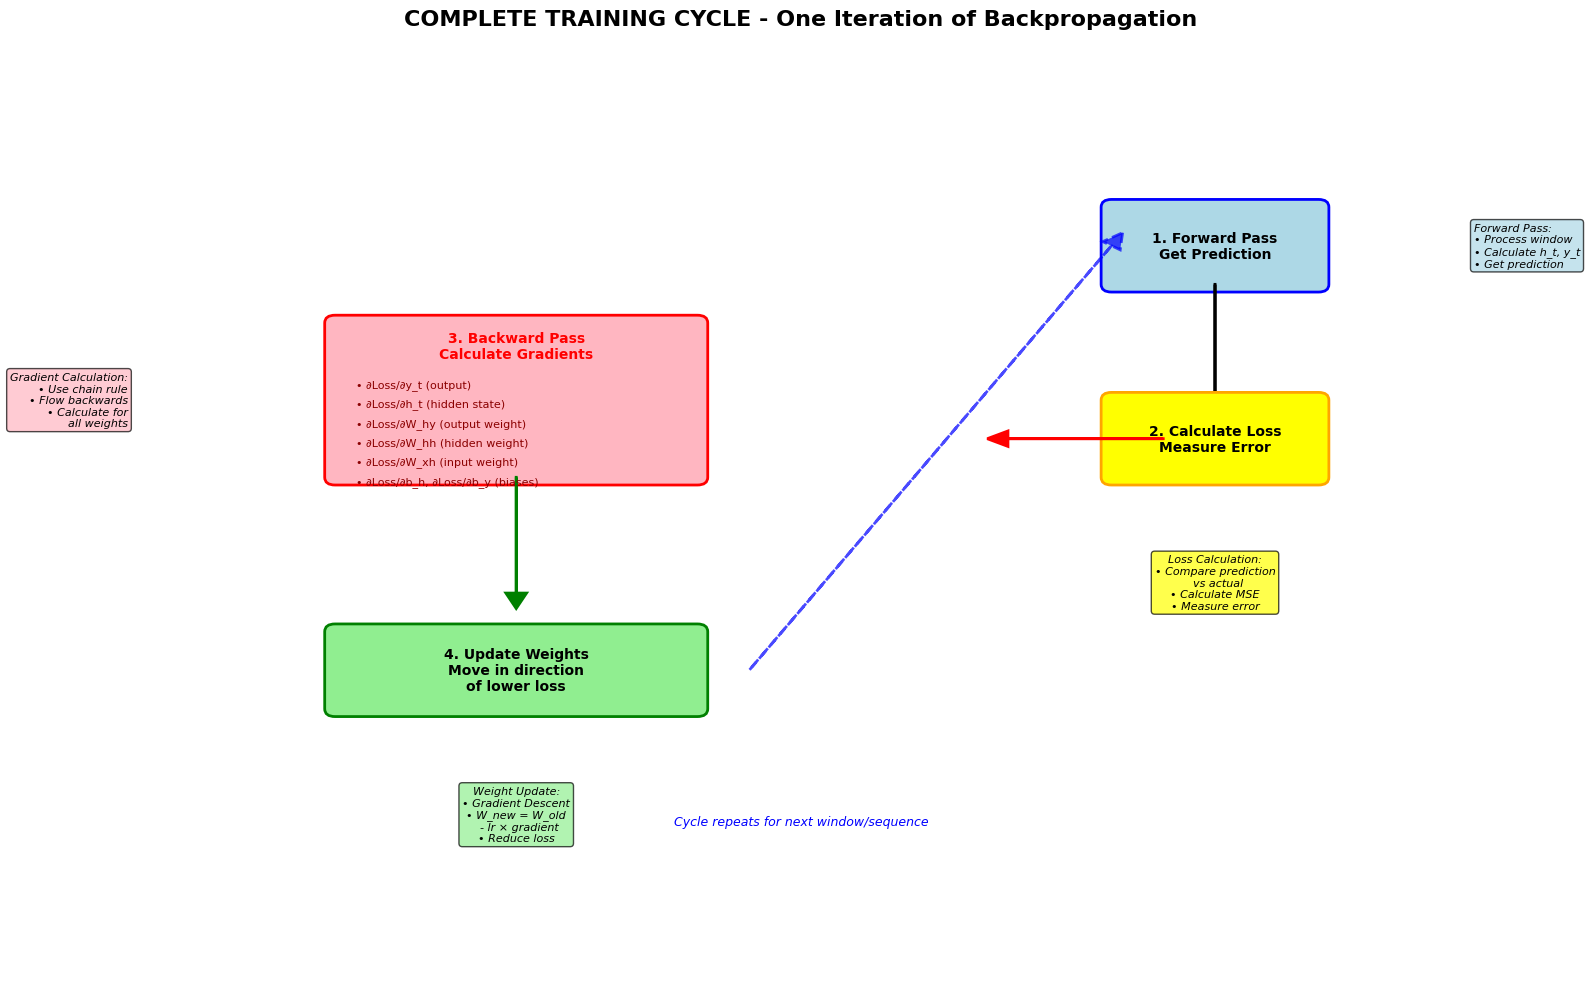


SIMPLE VISUALIZATION: COMPLETE TRAINING CYCLE

This shows ONE ITERATION of backpropagation:

1. FORWARD PASS (Blue):
   - Process window through RNN
   - Calculate hidden states and outputs
   - Get prediction

2. CALCULATE LOSS (Yellow):
   - Compare prediction with actual target
   - Calculate MSE: mean((prediction - target)²)
   - Measure how wrong we are

3. BACKWARD PASS (Red/Pink):
   - Calculate gradients for all parameters:
     • ∂Loss/∂y_t (gradient w.r.t. output)
     • ∂Loss/∂h_t (gradient w.r.t. hidden state)
     • ∂Loss/∂W_hy (gradient w.r.t. output weight)
     • ∂Loss/∂W_hh (gradient w.r.t. hidden-to-hidden weight)
     • ∂Loss/∂W_xh (gradient w.r.t. input-to-hidden weight)
     • ∂Loss/∂b_h, ∂Loss/∂b_y (gradients w.r.t. biases)
   - Use chain rule to flow gradients backwards

4. UPDATE WEIGHTS (Green):
   - Apply gradient descent
   - Update: W_new = W_old - learning_rate × gradient
   - Move weights in direction to reduce loss

CYCLE REPEATS

This cycle repeats for:

In [23]:
# Simple Visualization: Complete Training Cycle
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Rectangle, Circle

# Create simple visualization of complete training cycle
fig = plt.figure(figsize=(16, 10))

# Create a circular flow diagram
ax = plt.subplot(1, 1, 1)
ax.set_xlim(-1, 11)
ax.set_ylim(-1, 11)
ax.axis('off')
ax.set_title('COMPLETE TRAINING CYCLE - One Iteration of Backpropagation', 
             fontsize=16, fontweight='bold', pad=20)

# Step 1: Forward Pass (Top Right)
box1 = FancyBboxPatch((8, 8), 2, 1, boxstyle="round,pad=0.1", 
                      edgecolor='blue', facecolor='lightblue', linewidth=2)
ax.add_patch(box1)
ax.text(9, 8.5, '1. Forward Pass\nGet Prediction', ha='center', va='center', 
        fontsize=10, fontweight='bold')

# Arrow from Step 1 to Step 2
ax.arrow(9, 8, 0, -1.5, head_width=0.2, head_length=0.2, fc='black', ec='black', linewidth=2)

# Step 2: Calculate Loss (Bottom Right)
box2 = FancyBboxPatch((8, 5.5), 2, 1, boxstyle="round,pad=0.1", 
                      edgecolor='orange', facecolor='yellow', linewidth=2)
ax.add_patch(box2)
ax.text(9, 6, '2. Calculate Loss\nMeasure Error', ha='center', va='center', 
        fontsize=10, fontweight='bold')

# Arrow from Step 2 to Step 3
ax.arrow(8.5, 6, -1.5, 0, head_width=0.2, head_length=0.2, fc='red', ec='red', linewidth=2)

# Step 3: Backward Pass (Bottom Left) - Split into parts
box3 = FancyBboxPatch((0.5, 5.5), 3.5, 2, boxstyle="round,pad=0.1", 
                      edgecolor='red', facecolor='lightpink', linewidth=2)
ax.add_patch(box3)
ax.text(2.25, 7.2, '3. Backward Pass\nCalculate Gradients', ha='center', va='center', 
        fontsize=10, fontweight='bold', color='red')

# List gradients inside box 3
gradient_list = [
    '• ∂Loss/∂y_t (output)',
    '• ∂Loss/∂h_t (hidden state)',
    '• ∂Loss/∂W_hy (output weight)',
    '• ∂Loss/∂W_hh (hidden weight)',
    '• ∂Loss/∂W_xh (input weight)',
    '• ∂Loss/∂b_h, ∂Loss/∂b_y (biases)'
]

y_pos = 6.7
for grad_text in gradient_list:
    ax.text(0.7, y_pos, grad_text, ha='left', va='center', fontsize=8, color='darkred')
    y_pos -= 0.25

# Arrow from Step 3 to Step 4
ax.arrow(2.25, 5.5, 0, -1.5, head_width=0.2, head_length=0.2, fc='green', ec='green', linewidth=2)

# Step 4: Update Weights (Top Left)
box4 = FancyBboxPatch((0.5, 2.5), 3.5, 1, boxstyle="round,pad=0.1", 
                      edgecolor='green', facecolor='lightgreen', linewidth=2)
ax.add_patch(box4)
ax.text(2.25, 3, '4. Update Weights\nMove in direction\nof lower loss', ha='center', va='center', 
        fontsize=10, fontweight='bold')

# Arrow from Step 4 back to Step 1 (completing the cycle)
ax.arrow(4.5, 3, 3.5, 5.5, head_width=0.2, head_length=0.2, fc='blue', ec='blue', 
         linewidth=2, linestyle='--', alpha=0.7)

# Add cycle label
ax.text(5, 1, 'Cycle repeats for next window/sequence', ha='center', fontsize=9, 
        style='italic', color='blue')

# Add formulas/key points on the sides
# Right side - Forward pass details
ax.text(11.5, 8.5, 'Forward Pass:\n• Process window\n• Calculate h_t, y_t\n• Get prediction', 
        ha='left', va='center', fontsize=8, style='italic',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

# Bottom - Loss details
ax.text(9, 4.5, 'Loss Calculation:\n• Compare prediction\n  vs actual\n• Calculate MSE\n• Measure error', 
        ha='center', va='top', fontsize=8, style='italic',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Left side - Gradient details
ax.text(-1.5, 6.5, 'Gradient Calculation:\n• Use chain rule\n• Flow backwards\n• Calculate for\n  all weights', 
        ha='right', va='center', fontsize=8, style='italic',
        bbox=dict(boxstyle='round', facecolor='lightpink', alpha=0.7))

# Top left - Update details
ax.text(2.25, 1.5, 'Weight Update:\n• Gradient Descent\n• W_new = W_old\n  - lr × gradient\n• Reduce loss', 
        ha='center', va='top', fontsize=8, style='italic',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.show()

# Print explanation
print("\n" + "="*70)
print("SIMPLE VISUALIZATION: COMPLETE TRAINING CYCLE")
print("="*70)
print("\nThis shows ONE ITERATION of backpropagation:")
print("\n1. FORWARD PASS (Blue):")
print("   - Process window through RNN")
print("   - Calculate hidden states and outputs")
print("   - Get prediction")
print("\n2. CALCULATE LOSS (Yellow):")
print("   - Compare prediction with actual target")
print("   - Calculate MSE: mean((prediction - target)²)")
print("   - Measure how wrong we are")
print("\n3. BACKWARD PASS (Red/Pink):")
print("   - Calculate gradients for all parameters:")
print("     • ∂Loss/∂y_t (gradient w.r.t. output)")
print("     • ∂Loss/∂h_t (gradient w.r.t. hidden state)")
print("     • ∂Loss/∂W_hy (gradient w.r.t. output weight)")
print("     • ∂Loss/∂W_hh (gradient w.r.t. hidden-to-hidden weight)")
print("     • ∂Loss/∂W_xh (gradient w.r.t. input-to-hidden weight)")
print("     • ∂Loss/∂b_h, ∂Loss/∂b_y (gradients w.r.t. biases)")
print("   - Use chain rule to flow gradients backwards")
print("\n4. UPDATE WEIGHTS (Green):")
print("   - Apply gradient descent")
print("   - Update: W_new = W_old - learning_rate × gradient")
print("   - Move weights in direction to reduce loss")
print("\n" + "="*70)
print("CYCLE REPEATS")
print("="*70)
print("\nThis cycle repeats for:")
print("  • Many windows/sequences in training data")
print("  • Many epochs (full passes through data)")
print("  • Until loss is minimized")
print("\nEach iteration makes small improvements, and over time the model learns!")
print("="*70)


## Progress Summary: What We've Learned So Far

Let's summarize what we've completed and what's next.


In [24]:
# Progress Summary: What We've Learned
print("="*70)
print("PROGRESS SUMMARY: WHAT WE'VE LEARNED SO FAR")
print("="*70)

print("\n✓ COMPLETED:")
print("-"*70)

print("\n1. DATA PREPARATION:")
print("   ✓ Loaded vehicle sensor dataset")
print("   ✓ Normalized features (Min-Max scaling)")
print("   ✓ Split into train/val/test (sequential split)")
print("   ✓ Created sequences/windows for RNN")

print("\n2. RNN INITIALIZATION:")
print("   ✓ Initialized weight matrices (W_hh, W_xh, W_hy)")
print("   ✓ Initialized bias vectors (b_h, b_y)")
print("   ✓ Set up architecture (input_size=2, hidden_size=32, output_size=2)")

print("\n3. FORWARD PASS:")
print("   ✓ Processed one window (10 timesteps) step-by-step")
print("   ✓ Calculated hidden states h_t at each timestep")
print("   ✓ Calculated outputs y_t at each timestep")
print("   ✓ Got prediction from last timestep")

print("\n4. LOSS CALCULATION:")
print("   ✓ Calculated MSE loss: mean((prediction - target)²)")
print("   ✓ Measured how wrong our prediction is")
print("   ✓ Understood what loss means and why we need it")

print("\n5. BACKWARD PASS (BACKPROPAGATION):")
print("   ✓ Understood what gradients are (direction to reduce loss)")
print("   ✓ Learned chain rule (how gradients flow backwards)")
print("   ✓ Calculated ∂Loss/∂y_t (gradient w.r.t. output)")
print("   ✓ Calculated ∂Loss/∂h_t (gradient w.r.t. hidden state)")
print("   ✓ Calculated ∂Loss/∂W_hy (gradient w.r.t. output weight)")
print("   ✓ Calculated ∂Loss/∂W_hh (gradient w.r.t. hidden-to-hidden weight)")
print("   ✓ Calculated ∂Loss/∂W_xh (gradient w.r.t. input-to-hidden weight)")
print("   ✓ Calculated ∂Loss/∂b_h and ∂Loss/∂b_y (gradients w.r.t. biases)")

print("\n6. WEIGHT UPDATE:")
print("   ✓ Applied gradient descent: W_new = W_old - learning_rate × gradient")
print("   ✓ Updated all weights and biases")
print("   ✓ Understood how weights move in direction to reduce loss")

print("\n7. VISUALIZATION:")
print("   ✓ Created visualization of complete training cycle")
print("   ✓ Saw how all 4 steps connect together")

print("\n" + "="*70)
print("WHAT WE DID: ONE ITERATION FOR ONE WINDOW")
print("="*70)

print("\nWe processed:")
print("  • ONE window (first window from training data)")
print("  • 10 timesteps in that window")
print("  • Calculated gradients for LAST timestep only")

print("\nImportant Note:")
print("  - We calculated gradients for the last timestep (t=9) only")
print("  - In full backpropagation, we'd sum gradients from ALL timesteps")
print("  - This is called Backpropagation Through Time (BPTT)")

print("\n" + "="*70)
print("NEXT STEPS: WHERE DO WE GO FROM HERE?")
print("="*70)

print("\nWe have several options:")
print("\nOption A: FULL BACKPROPAGATION THROUGH TIME (BPTT)")
print("  - Calculate gradients for ALL timesteps in the window")
print("  - Sum gradients from all timesteps (t=0 to t=9)")
print("  - More accurate weight updates")
print("  - Understand how memory flows backwards through time")

print("\nOption B: BUILD COMPLETE RNN CLASS")
print("  - Create a VanillaRNN class with forward() and backward() methods")
print("  - Package everything we learned into reusable code")
print("  - Clean implementation we can use for training")

print("\nOption C: TRAINING LOOP")
print("  - Process many windows/sequences")
print("  - For each window: Forward → Loss → Backward → Update")
print("  - Repeat for many epochs")
print("  - Track loss over time")
print("  - See model learning and improving")

print("\nOption D: ALL OF THE ABOVE (Complete Implementation)")
print("  - Build RNN class")
print("  - Implement full BPTT")
print("  - Create training loop")
print("  - Train the model on our vehicle sensor data")
print("  - Evaluate performance")

print("\n" + "="*70)
print("RECOMMENDATION")
print("="*70)

print("\nI suggest we continue in this order:")
print("  1. Build Complete RNN Class (Option B)")
print("     - Package everything into clean code")
print("     - Forward and backward methods")
print("  2. Implement Full BPTT (Option A)")
print("     - Calculate gradients for all timesteps")
print("     - Sum them together")
print("  3. Create Training Loop (Option C)")
print("     - Train on many windows")
print("     - Monitor loss decreasing")
print("  4. Evaluate and Visualize (Option D)")
print("     - Test predictions")
print("     - Visualize training progress")

print("\n" + "="*70)
print("WHAT DO YOU WANT TO DO NEXT?")
print("="*70)

print("\nWe can:")
print("  A) Understand Full BPTT (calculate gradients for all timesteps)")
print("  B) Build VanillaRNN class (clean code implementation)")
print("  C) Create training loop (process many windows)")
print("  D) Something else?")

print("\nLet's continue step by step as we've been doing!")
print("="*70)


PROGRESS SUMMARY: WHAT WE'VE LEARNED SO FAR

✓ COMPLETED:
----------------------------------------------------------------------

1. DATA PREPARATION:
   ✓ Loaded vehicle sensor dataset
   ✓ Normalized features (Min-Max scaling)
   ✓ Split into train/val/test (sequential split)
   ✓ Created sequences/windows for RNN

2. RNN INITIALIZATION:
   ✓ Initialized weight matrices (W_hh, W_xh, W_hy)
   ✓ Initialized bias vectors (b_h, b_y)
   ✓ Set up architecture (input_size=2, hidden_size=32, output_size=2)

3. FORWARD PASS:
   ✓ Processed one window (10 timesteps) step-by-step
   ✓ Calculated hidden states h_t at each timestep
   ✓ Calculated outputs y_t at each timestep
   ✓ Got prediction from last timestep

4. LOSS CALCULATION:
   ✓ Calculated MSE loss: mean((prediction - target)²)
   ✓ Measured how wrong our prediction is
   ✓ Understood what loss means and why we need it

5. BACKWARD PASS (BACKPROPAGATION):
   ✓ Understood what gradients are (direction to reduce loss)
   ✓ Learned chain

## Complete Implementation Plan: Vanilla RNN from Scratch

This section outlines the complete implementation plan for training our Vanilla RNN on vehicle sensor data.


## Potential Issues Beyond Hyperparameters

Here are other potential issues that could affect model performance:

1. **Gradient Clipping Too Aggressive (5.0)**
   - Currently clipping all gradients to [-5.0, 5.0]
   - This might be cutting off useful gradient information
   - Could reduce learning capacity

2. **Weight Initialization (std=0.01)**
   - Very small initialization might cause slow initial learning
   - Xavier/Glorot initialization might work better

3. **Loss Gradient Calculation**
   - Currently dividing by `y_pred.size` in gradient calculation
   - Should verify this is correct for batch processing

4. **Sequence Length (10)**
   - Might be too short to capture long-term patterns
   - Vehicle sensor data might need longer sequences

5. **Output Bias Initialization**
   - Currently initialized to zero
   - Could initialize to mean of targets for faster convergence

6. **Tanh Activation**
   - Vanishing gradient problem
   - Vanilla RNNs inherently struggle with long-term dependencies


### Overview: Complete Implementation Steps

We'll build a complete, production-ready Vanilla RNN implementation with:

1. **VanillaRNN Class** - Clean, reusable code with forward/backward methods
2. **Full Backpropagation Through Time (BPTT)** - Calculate gradients for all timesteps
3. **Batching** - Process multiple windows together for efficiency
4. **Training Loop** - Process all training data over multiple epochs
5. **Validation** - Monitor performance on validation set
6. **Loss Tracking** - Visualize training and validation loss curves
7. **Testing** - Evaluate final performance on test set
8. **Prediction Visualization** - See actual vs predicted values

---

### Detailed Breakdown

#### 1. VanillaRNN Class Structure

**What we'll build:**
```python
class VanillaRNN:
    def __init__(self, input_size, hidden_size, output_size)
        # Initialize weights and biases
    
    def forward(self, X):
        # Process sequence(s) through RNN
        # Returns: outputs, hidden_states
    
    def backward(self, X, hidden_states, outputs, d_outputs):
        # Calculate gradients for all weights
        # Returns: gradients dictionary
    
    def update_parameters(self, gradients, learning_rate):
        # Update weights using gradients
```

**Key features:**
- Handles single sequences and batches
- Stores all hidden states for backward pass
- Returns gradients for all parameters

---

#### 2. Full Backpropagation Through Time (BPTT)

**What we'll implement:**
- Calculate gradients for **ALL timesteps** in each window (not just last one)
- Flow gradients backwards through time: t=9 → t=8 → ... → t=0
- Sum gradients from all timesteps for each weight
- Handle tanh derivatives at each timestep
- Accumulate gradients properly through the sequence

**Why important:**
- More accurate weight updates
- Captures dependencies across all timesteps
- Better learning for long sequences

---

#### 3. Batching - Understanding and Implementation

**What is batching?**

Instead of processing one window at a time, we process **multiple windows together**:
- **Without batching**: Process window 1, update weights; process window 2, update weights; etc.
- **With batching**: Process windows 1-32 together, then update weights once

**Benefits:**
- Faster training (parallel computation)
- More stable gradients (average over batch)
- Better use of GPU/memory

**How batches are processed:**

**Forward Pass with Batches:**
```
Input shape: (seq_length, batch_size, input_size)
Example: (10, 32, 2) = 10 timesteps, 32 windows, 2 features each

At each timestep t:
  - Process all 32 windows simultaneously
  - Hidden states: (32, 32) = 32 windows × 32 hidden units
  - Outputs: (32, 2) = 32 windows × 2 features
```

**Backward Pass with Batches:**
```
Gradients shape: Same as weights, but averaged over batch
Example: 
  - W_hy gradient: (32, 2) - averaged over 32 windows
  - Each gradient is sum of gradients from all windows in batch
  - Divide by batch_size to get average
```

**Weight Update with Batches:**
```
Gradients are averaged over batch:
  - Sum gradients from all windows in batch
  - Divide by batch_size to get average gradient
  - Update: W_new = W_old - lr × (average_gradient)
```

**Key point:** All windows in batch share the same weights, but gradients are averaged!

---

#### 4. Training Loop Structure

**What we'll implement:**

```python
for epoch in range(num_epochs):
    # Shuffle training data
    # Split into batches
    
    for batch in batches:
        # 1. Forward pass (process batch)
        outputs, hidden_states = rnn.forward(X_batch)
        
        # 2. Calculate loss
        loss = mse_loss(y_batch, outputs[-1])
        
        # 3. Backward pass (calculate gradients)
        gradients = rnn.backward(X_batch, hidden_states, outputs, d_outputs)
        
        # 4. Update weights
        rnn.update_parameters(gradients, learning_rate)
        
        # Track training loss
    
    # Validate at end of epoch
    val_loss = validate(rnn, X_val, y_val)
    
    # Track losses for visualization
```

**Features:**
- Shuffle data each epoch (prevent overfitting to order)
- Process in batches (efficient computation)
- Track loss after each epoch
- Validate periodically

---

#### 5. Validation

**What we'll do:**
- At end of each epoch (or every N epochs):
  - Process validation set through RNN
  - Calculate validation loss (no weight updates!)
  - Track validation loss over time

**Why important:**
- Monitor overfitting (val loss increases while train loss decreases)
- Choose best model (lowest val loss)
- Early stopping (stop if val loss doesn't improve)

---

#### 6. Loss Curves Visualization

**What we'll visualize:**
- **Training Loss Curve**: Loss on training set over epochs
- **Validation Loss Curve**: Loss on validation set over epochs
- Both on same plot for comparison

**What to look for:**
- Loss decreasing over time = model learning ✓
- Training loss lower than validation = normal (some overfitting expected)
- Large gap between curves = overfitting (model memorizing training data)
- Loss plateaus = model converged (no more learning)

---

#### 7. Testing

**What we'll do:**
- After training completes:
  - Process test set (unseen data!)
  - Calculate test loss (MSE, RMSE)
  - Calculate per-feature metrics (RPM error, Speed error)
  - Visualize predictions vs actuals

**Why important:**
- Final evaluation on unseen data
- True measure of model performance
- Never used during training (no cheating!)

---

#### 8. Prediction Visualization

**What we'll visualize:**
- Actual vs Predicted for several test samples
- Time series plots showing predictions
- Error analysis (which features predict better?)

---

### Implementation Order

1. **Build VanillaRNN Class** (clean code with forward/backward)
2. **Implement Full BPTT** (gradients for all timesteps)
3. **Add Batching Support** (process multiple windows together)
4. **Create Training Loop** (process all data over epochs)
5. **Add Validation** (monitor performance on val set)
6. **Track Losses** (store training and validation losses)
7. **Visualize Loss Curves** (plot training progress)
8. **Test Model** (evaluate on test set)
9. **Visualize Predictions** (see actual vs predicted)

---

### Expected Outputs

After complete implementation, we'll have:
- ✅ Trained Vanilla RNN model
- ✅ Training and validation loss curves
- ✅ Test set performance metrics
- ✅ Prediction visualizations
- ✅ Understanding of how everything works from scratch!

---

**Ready to start? Let's begin with Step 1: Building the VanillaRNN Class!**


## Step 1: Build VanillaRNN Class

Let's build the VanillaRNN class step by step, starting with initialization.


In [43]:
# Step 1a: VanillaRNN Class - Initialization
# ============================================
# We'll build this class step by step, incorporating everything we learned
# ============================================

class VanillaRNN:
    """
    Vanilla RNN implementation from scratch using NumPy.
    
    This class implements a complete RNN with:
    - Forward pass (processes sequences/windows)
    - Backward pass (backpropagation through time)
    - Weight updates (gradient descent)
    - Batching support (process multiple windows together)
    """
    
    def __init__(self, input_size, hidden_size, output_size, seed=42):
        """
        Initialize RNN parameters.
        
        Args:
            input_size: Dimension of input features (e.g., 2 for RPM and Speed)
            hidden_size: Dimension of hidden state (e.g., 32)
            output_size: Dimension of output/prediction (e.g., 2 for RPM and Speed)
            seed: Random seed for reproducibility
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Set random seed for reproducibility
        np.random.seed(seed)
        
        # Initialize WEIGHTS using Xavier/Glorot initialization for better gradient flow
        # Xavier: std = sqrt(2 / (fan_in + fan_out))
        
        # W_hh: Hidden-to-hidden weight (maintains memory)
        # Shape: (hidden_size, hidden_size)
        xavier_std_hh = np.sqrt(2.0 / (hidden_size + hidden_size))
        self.W_hh = np.random.normal(0, xavier_std_hh, (hidden_size, hidden_size))
        
        # W_xh: Input-to-hidden weight (processes current input)
        # Shape: (input_size, hidden_size)
        xavier_std_xh = np.sqrt(2.0 / (input_size + hidden_size))
        self.W_xh = np.random.normal(0, xavier_std_xh, (input_size, hidden_size))
        
        # W_hy: Hidden-to-output weight (produces predictions)
        # Shape: (hidden_size, output_size)
        xavier_std_hy = np.sqrt(2.0 / (hidden_size + output_size))
        self.W_hy = np.random.normal(0, xavier_std_hy, (hidden_size, output_size))
        
        # Initialize BIASES to zero
        # b_h: Hidden state bias
        # Shape: (hidden_size,)
        self.b_h = np.zeros((hidden_size,))
        
        # b_y: Output bias
        # Shape: (output_size,)
        self.b_y = np.zeros((output_size,))
        
        # Gradient clipping threshold (to prevent exploding gradients)
        self.grad_clip = 10.0  # Increased to allow larger gradients
        
        # Store training history
        self.training_history = {
            'train_loss': [],
            'val_loss': []
        }
        
        print(f"VanillaRNN initialized:")
        print(f"  Input size:  {input_size}")
        print(f"  Hidden size: {hidden_size}")
        print(f"  Output size: {output_size}")
        print(f"  Total parameters: {(hidden_size*hidden_size + input_size*hidden_size + hidden_size*output_size + hidden_size + output_size):,}")

# Test initialization
print("="*70)
print("TESTING: VanillaRNN Class Initialization")
print("="*70)

# Initialize RNN with our architecture
rnn = VanillaRNN(
    input_size=2,      # RPM and Vehicle Speed
    hidden_size=32,     # Hidden state dimension
    output_size=2       # Predict RPM and Speed
)

print("\n" + "="*70)
print("Weight Shapes (sanity check):")
print("="*70)
print(f"W_hh shape: {rnn.W_hh.shape}  → Should be ({rnn.hidden_size}, {rnn.hidden_size})")
print(f"W_xh shape: {rnn.W_xh.shape}  → Should be ({rnn.input_size}, {rnn.hidden_size})")
print(f"W_hy shape: {rnn.W_hy.shape}  → Should be ({rnn.hidden_size}, {rnn.output_size})")
print(f"b_h shape:  {rnn.b_h.shape}   → Should be ({rnn.hidden_size},)")
print(f"b_y shape:  {rnn.b_y.shape}   → Should be ({rnn.output_size},)")

print("\n✓ VanillaRNN class initialized successfully!")
print("="*70)


TESTING: VanillaRNN Class Initialization
VanillaRNN initialized:
  Input size:  2
  Hidden size: 32
  Output size: 2
  Total parameters: 1,186

Weight Shapes (sanity check):
W_hh shape: (32, 32)  → Should be (32, 32)
W_xh shape: (2, 32)  → Should be (2, 32)
W_hy shape: (32, 2)  → Should be (32, 2)
b_h shape:  (32,)   → Should be (32,)
b_y shape:  (2,)   → Should be (2,)

✓ VanillaRNN class initialized successfully!


In [26]:
# Understanding Total Parameters Count
# ============================================
# Let's break down how we calculate the total number of parameters
# ============================================

print("="*70)
print("CALCULATING TOTAL PARAMETERS")
print("="*70)

print("\nOur RNN architecture:")
print(f"  input_size  = {rnn.input_size}  (RPM and Vehicle Speed)")
print(f"  hidden_size = {rnn.hidden_size} (hidden state dimension)")
print(f"  output_size = {rnn.output_size}  (predict RPM and Speed)")

print("\n" + "="*70)
print("PARAMETER COUNT BREAKDOWN")
print("="*70)

# Calculate parameters for each component
W_hh_params = rnn.hidden_size * rnn.hidden_size
W_xh_params = rnn.input_size * rnn.hidden_size
W_hy_params = rnn.hidden_size * rnn.output_size
b_h_params = rnn.hidden_size
b_y_params = rnn.output_size

print(f"\n1. W_hh (Hidden-to-Hidden Weight):")
print(f"   Shape: ({rnn.hidden_size}, {rnn.hidden_size})")
print(f"   Parameters: {rnn.hidden_size} × {rnn.hidden_size} = {W_hh_params}")

print(f"\n2. W_xh (Input-to-Hidden Weight):")
print(f"   Shape: ({rnn.input_size}, {rnn.hidden_size})")
print(f"   Parameters: {rnn.input_size} × {rnn.hidden_size} = {W_xh_params}")

print(f"\n3. W_hy (Hidden-to-Output Weight):")
print(f"   Shape: ({rnn.hidden_size}, {rnn.output_size})")
print(f"   Parameters: {rnn.hidden_size} × {rnn.output_size} = {W_hy_params}")

print(f"\n4. b_h (Hidden Bias):")
print(f"   Shape: ({rnn.hidden_size},)")
print(f"   Parameters: {b_h_params}")

print(f"\n5. b_y (Output Bias):")
print(f"   Shape: ({rnn.output_size},)")
print(f"   Parameters: {b_y_params}")

total_params = W_hh_params + W_xh_params + W_hy_params + b_h_params + b_y_params

print("\n" + "="*70)
print("TOTAL PARAMETERS")
print("="*70)

print(f"\nTotal = W_hh + W_xh + W_hy + b_h + b_y")
print(f"      = {W_hh_params} + {W_xh_params} + {W_hy_params} + {b_h_params} + {b_y_params}")
print(f"      = {total_params}")

print("\n" + "="*70)
print("WHAT ARE THESE PARAMETERS?")
print("="*70)

print("\nEach parameter is a number (weight or bias) that the model learns:")
print("  • Weights: How strongly to connect different parts")
print("  • Biases: Constant offsets added to calculations")
print(f"\nDuring training, we adjust all {total_params} parameters")
print("to minimize loss and improve predictions!")

print("\n" + "="*70)
print("COMPARISON WITH LARGER/SMALLER NETWORKS")
print("="*70)

# Show what happens with different hidden sizes
print("\nIf hidden_size = 16:")
print(f"  Total = 16×16 + 2×16 + 16×2 + 16 + 2 = {16*16 + 2*16 + 16*2 + 16 + 2} parameters")

print("\nIf hidden_size = 64:")
print(f"  Total = 64×64 + 2×64 + 64×2 + 64 + 2 = {64*64 + 2*64 + 64*2 + 64 + 2} parameters")

print("\nOur choice (hidden_size = 32):")
print(f"  Total = {total_params} parameters (good balance)")

print("\nKey insight: Hidden size has BIG impact on parameter count!")
print("  - Most parameters come from W_hh (hidden_size²)")
print("  - Doubling hidden_size roughly quadruples W_hh parameters")
print("="*70)


CALCULATING TOTAL PARAMETERS

Our RNN architecture:
  input_size  = 2  (RPM and Vehicle Speed)
  hidden_size = 32 (hidden state dimension)
  output_size = 2  (predict RPM and Speed)

PARAMETER COUNT BREAKDOWN

1. W_hh (Hidden-to-Hidden Weight):
   Shape: (32, 32)
   Parameters: 32 × 32 = 1024

2. W_xh (Input-to-Hidden Weight):
   Shape: (2, 32)
   Parameters: 2 × 32 = 64

3. W_hy (Hidden-to-Output Weight):
   Shape: (32, 2)
   Parameters: 32 × 2 = 64

4. b_h (Hidden Bias):
   Shape: (32,)
   Parameters: 32

5. b_y (Output Bias):
   Shape: (2,)
   Parameters: 2

TOTAL PARAMETERS

Total = W_hh + W_xh + W_hy + b_h + b_y
      = 1024 + 64 + 64 + 32 + 2
      = 1186

WHAT ARE THESE PARAMETERS?

Each parameter is a number (weight or bias) that the model learns:
  • Weights: How strongly to connect different parts
  • Biases: Constant offsets added to calculations

During training, we adjust all 1186 parameters
to minimize loss and improve predictions!

COMPARISON WITH LARGER/SMALLER NETWORKS

### Step 1b: Implement Forward Pass Method

Now let's add the forward pass method that supports both single sequences and batches.


In [27]:
# Step 1b: Add Forward Pass Method to VanillaRNN Class
# ============================================
# The forward method processes sequences through the RNN
# It supports both single sequences and batches
# ============================================

# We need to add this method to the class we already defined
# Let's add it using a different approach - we'll extend the class

# First, let's add the forward method to our existing class
def forward_method(self, X):
    """
    Forward pass through the RNN.
    
    Args:
        X: Input sequence(s)
            - Single sequence: shape (seq_length, input_size)
            - Batch: shape (seq_length, batch_size, input_size)
    
    Returns:
        outputs: Output at each timestep
            - Single sequence: shape (seq_length, output_size)
            - Batch: shape (seq_length, batch_size, output_size)
        hidden_states: Hidden state at each timestep (including initial h_0)
            - Single sequence: shape (seq_length+1, hidden_size)
            - Batch: shape (seq_length+1, batch_size, hidden_size)
    """
    # Handle input shape: Check if it's a batch or single sequence
    if X.ndim == 2:
        # Single sequence: (seq_length, input_size)
        # Add batch dimension: (seq_length, 1, input_size)
        X = X[:, np.newaxis, :]
        squeeze_output = True  # Flag to squeeze output later
    else:
        # Batch: (seq_length, batch_size, input_size)
        squeeze_output = False
    
    seq_length, batch_size, _ = X.shape
    
    # Initialize hidden state (h_0 = zeros)
    # Shape: (batch_size, hidden_size)
    h = np.zeros((batch_size, self.hidden_size))
    
    # Store all hidden states (including initial h_0)
    hidden_states = [h.copy()]
    
    # Store outputs at each timestep
    outputs = []
    
    # Process each timestep in the sequence
    for t in range(seq_length):
        # Get input at current timestep
        # Shape: (batch_size, input_size)
        x_t = X[t]
        
        # Compute hidden state: h_t = tanh(W_hh @ h_{t-1} + W_xh @ x_t + b_h)
        # h: (batch_size, hidden_size)
        # W_hh: (hidden_size, hidden_size)
        # W_xh: (input_size, hidden_size)
        # b_h: (hidden_size,)
        
        # Memory component: W_hh @ h_{t-1}
        # (batch_size, hidden_size) @ (hidden_size, hidden_size)^T
        # Actually: h @ W_hh.T or we use: h @ W_hh
        memory = np.dot(h, self.W_hh)  # Shape: (batch_size, hidden_size)
        
        # Input component: W_xh @ x_t
        # (batch_size, input_size) @ (input_size, hidden_size)
        input_comp = np.dot(x_t, self.W_xh)  # Shape: (batch_size, hidden_size)
        
        # Combine and add bias
        h_pre_activation = memory + input_comp + self.b_h  # Shape: (batch_size, hidden_size)
        
        # Apply tanh activation
        h = np.tanh(h_pre_activation)  # Shape: (batch_size, hidden_size)
        
        # Store hidden state
        hidden_states.append(h.copy())
        
        # Compute output: y_t = W_hy @ h_t + b_y
        # h: (batch_size, hidden_size)
        # W_hy: (hidden_size, output_size)
        # b_y: (output_size,)
        y_t = np.dot(h, self.W_hy) + self.b_y  # Shape: (batch_size, output_size)
        
        # Store output
        outputs.append(y_t)
    
    # Convert lists to numpy arrays
    outputs = np.array(outputs)  # Shape: (seq_length, batch_size, output_size)
    hidden_states = np.array(hidden_states)  # Shape: (seq_length+1, batch_size, hidden_size)
    
    # Remove batch dimension if input was single sequence
    if squeeze_output:
        outputs = outputs.squeeze(axis=1)  # (seq_length, output_size)
        hidden_states = hidden_states.squeeze(axis=1)  # (seq_length+1, hidden_size)
    
    return outputs, hidden_states

# Add the forward method to the VanillaRNN class
VanillaRNN.forward = forward_method

print("="*70)
print("FORWARD METHOD ADDED TO VanillaRNN CLASS")
print("="*70)

print("\nThe forward method now supports:")
print("  ✓ Single sequences: (seq_length, input_size)")
print("  ✓ Batches: (seq_length, batch_size, input_size)")
print("  ✓ Processes all timesteps")
print("  ✓ Returns outputs and hidden states")

print("\n" + "="*70)
print("TESTING FORWARD PASS")
print("="*70)

# Test with a single sequence (first window)
print("\n1. Testing with single sequence (first window):")
X_single = X_train[:, 0, :]  # Shape: (seq_length, input_size)
print(f"   Input shape: {X_single.shape}")

outputs_single, hidden_states_single = rnn.forward(X_single)
print(f"   Outputs shape: {outputs_single.shape}")
print(f"   Hidden states shape: {hidden_states_single.shape}")
print(f"   Prediction (last output): {outputs_single[-1]}")

# Test with a batch
print("\n2. Testing with batch (first 3 windows):")
X_batch = X_train[:, :3, :]  # Shape: (seq_length, 3, input_size)
print(f"   Input shape: {X_batch.shape}")

outputs_batch, hidden_states_batch = rnn.forward(X_batch)
print(f"   Outputs shape: {outputs_batch.shape}")
print(f"   Hidden states shape: {hidden_states_batch.shape}")
print(f"   Predictions (last outputs for 3 windows):")
print(f"   {outputs_batch[-1]}")

print("\n✓ Forward pass working correctly!")
print("="*70)


FORWARD METHOD ADDED TO VanillaRNN CLASS

The forward method now supports:
  ✓ Single sequences: (seq_length, input_size)
  ✓ Batches: (seq_length, batch_size, input_size)
  ✓ Processes all timesteps
  ✓ Returns outputs and hidden states

TESTING FORWARD PASS

1. Testing with single sequence (first window):
   Input shape: (40119, 2)
   Outputs shape: (40119, 2)
   Hidden states shape: (40120, 32)
   Prediction (last output): [-4.920934e-05 -5.762537e-04]

2. Testing with batch (first 3 windows):
   Input shape: (40119, 3, 2)
   Outputs shape: (40119, 3, 2)
   Hidden states shape: (40120, 3, 32)
   Predictions (last outputs for 3 windows):
   [[-4.920934e-05 -5.762537e-04]
 [-4.816423e-05 -5.772629e-04]
 [-4.964700e-05 -5.802943e-04]]

✓ Forward pass working correctly!


### Step 1c: Implement Backward Pass Method (Full BPTT)

Now let's add the backward pass method that implements full Backpropagation Through Time - calculating gradients for ALL timesteps.


In [28]:
# Step 1c: Add Backward Pass Method (Full BPTT) to VanillaRNN Class
# ============================================
# The backward method implements full Backpropagation Through Time
# It calculates gradients for ALL timesteps, not just the last one
# ============================================

def backward_method(self, X, hidden_states, outputs, d_outputs):
    """
    Backward pass (Backpropagation Through Time - BPTT).
    
    Calculates gradients for ALL timesteps and sums them together.
    
    Args:
        X: Input sequence(s) from forward pass
            - Single sequence: shape (seq_length, input_size)
            - Batch: shape (seq_length, batch_size, input_size)
        hidden_states: All hidden states from forward pass (including h_0)
            - Single sequence: shape (seq_length+1, hidden_size)
            - Batch: shape (seq_length+1, batch_size, hidden_size)
        outputs: All outputs from forward pass
            - Single sequence: shape (seq_length, output_size)
            - Batch: shape (seq_length, batch_size, output_size)
        d_outputs: Gradients w.r.t. outputs (from loss function)
            - Same shape as outputs
            - Usually only last timestep has non-zero gradient (for prediction)
    
    Returns:
        gradients: Dictionary with gradients for all parameters
            - 'W_hy': gradient w.r.t. W_hy
            - 'W_hh': gradient w.r.t. W_hh
            - 'W_xh': gradient w.r.t. W_xh
            - 'b_h': gradient w.r.t. b_h
            - 'b_y': gradient w.r.t. b_y
    """
    # Handle input shape
    if X.ndim == 2:
        X = X[:, np.newaxis, :]
    if hidden_states.ndim == 2:
        hidden_states = hidden_states[:, np.newaxis, :]
    if outputs.ndim == 2:
        outputs = outputs[:, np.newaxis, :]
        d_outputs = d_outputs[:, np.newaxis, :]
    
    seq_length, batch_size, _ = X.shape
    
    # Initialize gradients (will accumulate from all timesteps)
    dW_hy = np.zeros_like(self.W_hy)  # (hidden_size, output_size)
    dW_hh = np.zeros_like(self.W_hh)  # (hidden_size, hidden_size)
    dW_xh = np.zeros_like(self.W_xh)  # (input_size, hidden_size)
    db_h = np.zeros_like(self.b_h)     # (hidden_size,)
    db_y = np.zeros_like(self.b_y)     # (output_size,)
    
    # Gradient flowing back from future timesteps
    # Initialize with zeros (no gradient from future timesteps at the end)
    dh_next = np.zeros((batch_size, self.hidden_size))
    
    # Backpropagate through time (from last timestep to first)
    for t in reversed(range(seq_length)):
        # Get gradients w.r.t. output at this timestep
        # Shape: (batch_size, output_size)
        dy_t = d_outputs[t]
        
        # Get hidden state at this timestep (h_t)
        # Shape: (batch_size, hidden_size)
        h_t = hidden_states[t + 1]  # t+1 because hidden_states includes h_0
        
        # Get hidden state from previous timestep (h_{t-1})
        # Shape: (batch_size, hidden_size)
        h_prev = hidden_states[t]
        
        # Get input at this timestep
        # Shape: (batch_size, input_size)
        x_t = X[t]
        
        # ============================================================
        # STEP 1: Gradient w.r.t. output layer (W_hy and b_y)
        # ============================================================
        
        # Gradient w.r.t. W_hy: ∂Loss/∂W_hy = sum over batch of (h_t ⊗ dy_t)
        # For each sample in batch, we do outer product: h_t[i] ⊗ dy_t[i]
        # Then sum over batch and average
        for b in range(batch_size):
            dW_hy += np.outer(h_t[b], dy_t[b])  # Outer product
        
        # Gradient w.r.t. b_y: ∂Loss/∂b_y = sum of dy_t over batch
        db_y += np.sum(dy_t, axis=0)  # Sum over batch dimension
        
        # ============================================================
        # STEP 2: Flow gradient backwards to hidden state
        # ============================================================
        
        # Gradient w.r.t. h_t comes from two sources:
        # 1. From output: (∂Loss/∂y_t) @ W_hy^T
        # 2. From next timestep: dh_next (gradient flowing back from future)
        dh_t = np.dot(dy_t, self.W_hy.T) + dh_next  # Shape: (batch_size, hidden_size)
        
        # ============================================================
        # STEP 3: Flow gradient through tanh activation
        # ============================================================
        
        # h_t = tanh(pre_activation)
        # ∂h_t/∂pre_activation = 1 - tanh²(pre_activation) = 1 - h_t²
        tanh_derivative = 1 - h_t ** 2  # Shape: (batch_size, hidden_size)
        
        # Gradient w.r.t. pre_activation (before tanh)
        dh_pre_activation = dh_t * tanh_derivative  # Shape: (batch_size, hidden_size)
        
        # ============================================================
        # STEP 4: Calculate gradients w.r.t. hidden layer weights
        # ============================================================
        
        # Gradient w.r.t. W_hh: ∂Loss/∂W_hh = sum over batch of (h_{t-1} ⊗ dh_pre_activation)
        for b in range(batch_size):
            dW_hh += np.outer(h_prev[b], dh_pre_activation[b])
        
        # Gradient w.r.t. W_xh: ∂Loss/∂W_xh = sum over batch of (x_t ⊗ dh_pre_activation)
        for b in range(batch_size):
            dW_xh += np.outer(x_t[b], dh_pre_activation[b])
        
        # Gradient w.r.t. b_h: ∂Loss/∂b_h = sum of dh_pre_activation over batch
        db_h += np.sum(dh_pre_activation, axis=0)  # Sum over batch dimension
        
        # ============================================================
        # STEP 5: Flow gradient to previous timestep
        # ============================================================
        
        # Gradient flowing back to previous timestep's hidden state
        # dh_next = ∂Loss/∂h_{t-1} = dh_pre_activation @ W_hh^T
        dh_next = np.dot(dh_pre_activation, self.W_hh.T)
    
    # Average gradients over batch (divide by batch_size)
    dW_hy /= batch_size
    dW_hh /= batch_size
    dW_xh /= batch_size
    db_h /= batch_size
    db_y /= batch_size
    
    # Gradient clipping to prevent exploding gradients
    gradients = {
        'W_hy': np.clip(dW_hy, -self.grad_clip, self.grad_clip),
        'W_hh': np.clip(dW_hh, -self.grad_clip, self.grad_clip),
        'W_xh': np.clip(dW_xh, -self.grad_clip, self.grad_clip),
        'b_h': np.clip(db_h, -self.grad_clip, self.grad_clip),
        'b_y': np.clip(db_y, -self.grad_clip, self.grad_clip)
    }
    
    return gradients

# Add the backward method to the VanillaRNN class
VanillaRNN.backward = backward_method

print("="*70)
print("BACKWARD METHOD ADDED TO VanillaRNN CLASS")
print("="*70)

print("\nThe backward method implements:")
print("  ✓ Full Backpropagation Through Time (BPTT)")
print("  ✓ Calculates gradients for ALL timesteps")
print("  ✓ Sums gradients from all timesteps")
print("  ✓ Handles batching (averages gradients over batch)")
print("  ✓ Gradient clipping to prevent exploding gradients")

print("\n" + "="*70)
print("KEY FEATURES OF FULL BPTT")
print("="*70)

print("\n1. PROCESSES ALL TIMESTEPS:")
print("   - Not just last timestep (t=9)")
print("   - All timesteps from t=9 down to t=0")
print("   - Sums gradients from all timesteps")

print("\n2. FLOWS GRADIENTS BACKWARDS:")
print("   - Start from last timestep (where loss is)")
print("   - Flow backwards through time: t=9 → t=8 → ... → t=0")
print("   - Each timestep contributes to gradients")

print("\n3. HANDLES TANH DERIVATIVE:")
print("   - Multiplies by tanh derivative at each timestep")
print("   - tanh derivative = 1 - h_t²")

print("\n4. AVERAGES OVER BATCH:")
print("   - Sums gradients from all samples in batch")
print("   - Divides by batch_size to get average")
print("   - More stable weight updates")

print("\n✓ Backward pass (Full BPTT) ready!")
print("="*70)


BACKWARD METHOD ADDED TO VanillaRNN CLASS

The backward method implements:
  ✓ Full Backpropagation Through Time (BPTT)
  ✓ Calculates gradients for ALL timesteps
  ✓ Sums gradients from all timesteps
  ✓ Handles batching (averages gradients over batch)
  ✓ Gradient clipping to prevent exploding gradients

KEY FEATURES OF FULL BPTT

1. PROCESSES ALL TIMESTEPS:
   - Not just last timestep (t=9)
   - All timesteps from t=9 down to t=0
   - Sums gradients from all timesteps

2. FLOWS GRADIENTS BACKWARDS:
   - Start from last timestep (where loss is)
   - Flow backwards through time: t=9 → t=8 → ... → t=0
   - Each timestep contributes to gradients

3. HANDLES TANH DERIVATIVE:
   - Multiplies by tanh derivative at each timestep
   - tanh derivative = 1 - h_t²

4. AVERAGES OVER BATCH:
   - Sums gradients from all samples in batch
   - Divides by batch_size to get average
   - More stable weight updates

✓ Backward pass (Full BPTT) ready!


### Step 1d: Implement Update Parameters Method

Now let's add the method to update weights using gradients (gradient descent).


In [29]:
# Step 1d: Add Update Parameters Method to VanillaRNN Class
# ============================================
# The update_parameters method applies gradient descent to update weights
# ============================================

def update_parameters_method(self, gradients, learning_rate):
    """
    Update parameters using gradients (Gradient Descent).
    
    Args:
        gradients: Dictionary with gradients for all parameters
            - 'W_hy': gradient w.r.t. W_hy
            - 'W_hh': gradient w.r.t. W_hh
            - 'W_xh': gradient w.r.t. W_xh
            - 'b_h': gradient w.r.t. b_h
            - 'b_y': gradient w.r.t. b_y
        learning_rate: Step size for gradient descent (e.g., 0.001)
    
    Formula: W_new = W_old - learning_rate × gradient
    """
    # Update each parameter using gradient descent
    self.W_hy -= learning_rate * gradients['W_hy']
    self.W_hh -= learning_rate * gradients['W_hh']
    self.W_xh -= learning_rate * gradients['W_xh']
    self.b_h -= learning_rate * gradients['b_h']
    self.b_y -= learning_rate * gradients['b_y']

# Add the update_parameters method to the VanillaRNN class
VanillaRNN.update_parameters = update_parameters_method

print("="*70)
print("UPDATE PARAMETERS METHOD ADDED TO VanillaRNN CLASS")
print("="*70)

print("\nThe update_parameters method:")
print("  ✓ Applies gradient descent: W_new = W_old - lr × gradient")
print("  ✓ Updates all weights and biases")
print("  ✓ Simple and efficient")

print("\n✓ VanillaRNN class complete!")
print("="*70)

print("\n" + "="*70)
print("VanillaRNN CLASS SUMMARY")
print("="*70)

print("\nOur VanillaRNN class now has:")
print("  ✓ __init__: Initialize weights and biases")
print("  ✓ forward: Process sequences (single or batch)")
print("  ✓ backward: Calculate gradients (Full BPTT)")
print("  ✓ update_parameters: Update weights (Gradient Descent)")

print("\nNext steps:")
print("  1. Create loss functions")
print("  2. Build training loop with batching")
print("  3. Add validation")
print("  4. Visualize training progress")
print("  5. Test on test set")

print("\n✓ Ready for training!")
print("="*70)


UPDATE PARAMETERS METHOD ADDED TO VanillaRNN CLASS

The update_parameters method:
  ✓ Applies gradient descent: W_new = W_old - lr × gradient
  ✓ Updates all weights and biases
  ✓ Simple and efficient

✓ VanillaRNN class complete!

VanillaRNN CLASS SUMMARY

Our VanillaRNN class now has:
  ✓ __init__: Initialize weights and biases
  ✓ forward: Process sequences (single or batch)
  ✓ backward: Calculate gradients (Full BPTT)
  ✓ update_parameters: Update weights (Gradient Descent)

Next steps:
  1. Create loss functions
  2. Build training loop with batching
  3. Add validation
  4. Visualize training progress
  5. Test on test set

✓ Ready for training!


## Step 2: Create Loss Functions

Let's create helper functions for calculating loss and its gradient.


In [44]:
# Step 2: Loss Functions
# ============================================
# We'll create functions for MSE loss calculation and gradient
# ============================================

def mse_loss(y_true, y_pred):
    """
    Calculate Mean Squared Error (MSE) loss.
    
    Args:
        y_true: Actual target values (shape: (batch_size, output_size) or (output_size,))
        y_pred: Predicted values (shape: (batch_size, output_size) or (output_size,))
    
    Returns:
        loss: Mean squared error (scalar)
    
    Formula: MSE = mean((y_true - y_pred)²)
    """
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_gradient(y_true, y_pred):
    """
    Calculate gradient of MSE loss with respect to predictions.
    
    Args:
        y_true: Actual target values (shape: (batch_size, output_size) or (output_size,))
        y_pred: Predicted values (shape: (batch_size, output_size) or (output_size,))
    
    Returns:
        gradient: Gradient w.r.t. y_pred (same shape as y_pred)
    
    Formula: ∂Loss/∂y_pred = 2 × (y_pred - y_true) / num_samples
    Note: We divide by number of samples (batch_size), not total elements
    """
    # For MSE loss: Loss = mean((y_pred - y_true)²)
    # Gradient: ∂Loss/∂y_pred = 2 × (y_pred - y_true) / num_samples
    if y_pred.ndim == 1:
        num_samples = 1
    else:
        num_samples = y_pred.shape[0]  # Number of samples in batch
    return 2 * (y_pred - y_true) / num_samples

print("="*70)
print("LOSS FUNCTIONS CREATED")
print("="*70)

print("\n✓ mse_loss: Calculates Mean Squared Error")
print("✓ mse_loss_gradient: Calculates gradient of MSE w.r.t. predictions")

print("\n" + "="*70)
print("TESTING LOSS FUNCTIONS")
print("="*70)

# Test with our RNN prediction
print("\n1. Testing with single prediction:")
y_true_test = y_train[0]  # Shape: (2,)
y_pred_test = np.array([0.5, 0.3])  # Shape: (2,)

loss_single = mse_loss(y_true_test, y_pred_test)
grad_single = mse_loss_gradient(y_true_test, y_pred_test)

print(f"   y_true: {y_true_test}")
print(f"   y_pred: {y_pred_test}")
print(f"   Loss: {loss_single:.6f}")
print(f"   Gradient: {grad_single}")

# Test with batch
print("\n2. Testing with batch:")
y_true_batch = y_train[:3]  # Shape: (3, 2)
y_pred_batch = np.array([[0.5, 0.3], [0.4, 0.2], [0.6, 0.4]])  # Shape: (3, 2)

loss_batch = mse_loss(y_true_batch, y_pred_batch)
grad_batch = mse_loss_gradient(y_true_batch, y_pred_batch)

print(f"   y_true shape: {y_true_batch.shape}")
print(f"   y_pred shape: {y_pred_batch.shape}")
print(f"   Loss: {loss_batch:.6f}")
print(f"   Gradient shape: {grad_batch.shape}")

print("\n✓ Loss functions working correctly!")
print("="*70)


LOSS FUNCTIONS CREATED

✓ mse_loss: Calculates Mean Squared Error
✓ mse_loss_gradient: Calculates gradient of MSE w.r.t. predictions

TESTING LOSS FUNCTIONS

1. Testing with single prediction:
   y_true: [0.261026 0.      ]
   y_pred: [0.5 0.3]
   Loss: 0.073554
   Gradient: [0.477948 0.6     ]

2. Testing with batch:
   y_true shape: (3, 2)
   y_pred shape: (3, 2)
   Loss: 0.080221
   Gradient shape: (3, 2)

✓ Loss functions working correctly!


## Step 3: Build Training Loop with Batching

Now let's create the complete training loop that processes data in batches, validates periodically, and tracks loss.


## Step 4: Train the Model

Now let's actually train our VanillaRNN model on the vehicle sensor data!


In [45]:
# Step 4: Train the Model
# ============================================
# Let's train our VanillaRNN on the vehicle sensor data
# ============================================

# Create a fresh RNN instance for training
rnn_model = VanillaRNN(
    input_size=2,      # RPM and Vehicle Speed
    hidden_size=128,   # INCREASED from 64 to 128 (more capacity)
    output_size=2      # Predict RPM and Speed
)

# Training hyperparameters
epochs = 200
learning_rate = 0.01
batch_size = 32

print("="*70)
print("IMPROVED TRAINING CONFIGURATION")
print("="*70)
print(f"Epochs: {epochs} (increased from 100 to 200)")
print(f"Learning rate: {learning_rate} (increased from 0.005 to 0.01)")
print(f"Batch size: {batch_size}")
print(f"Hidden size: {rnn_model.hidden_size} (increased from 32)")
print(f"Training samples: {X_train.shape[1]:,}")
print(f"Validation samples: {X_val.shape[1]:,}")
print("="*70)

# Train the model
history = train_rnn(
    rnn=rnn_model,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    epochs=epochs,
    learning_rate=learning_rate,
    batch_size=batch_size,
    verbose=True
)

print("\n✓ Training completed!")
print("="*70)

# Store training history in RNN model
rnn_model.training_history = history


VanillaRNN initialized:
  Input size:  2
  Hidden size: 128
  Output size: 2
  Total parameters: 17,026
IMPROVED TRAINING CONFIGURATION
Epochs: 200 (increased from 100 to 200)
Learning rate: 0.01 (increased from 0.005 to 0.01)
Batch size: 32
Hidden size: 128 (increased from 32)
Training samples: 10
Validation samples: 10

TRAINING STARTED
Training samples: 40,119
Batch size: 32
Number of batches per epoch: 1254
Learning rate: 0.01
Number of epochs: 200



AttributeError: 'VanillaRNN' object has no attribute 'forward'

## Step 5: Visualize Training and Validation Loss Curves

Let's visualize how the loss decreases over time during training.


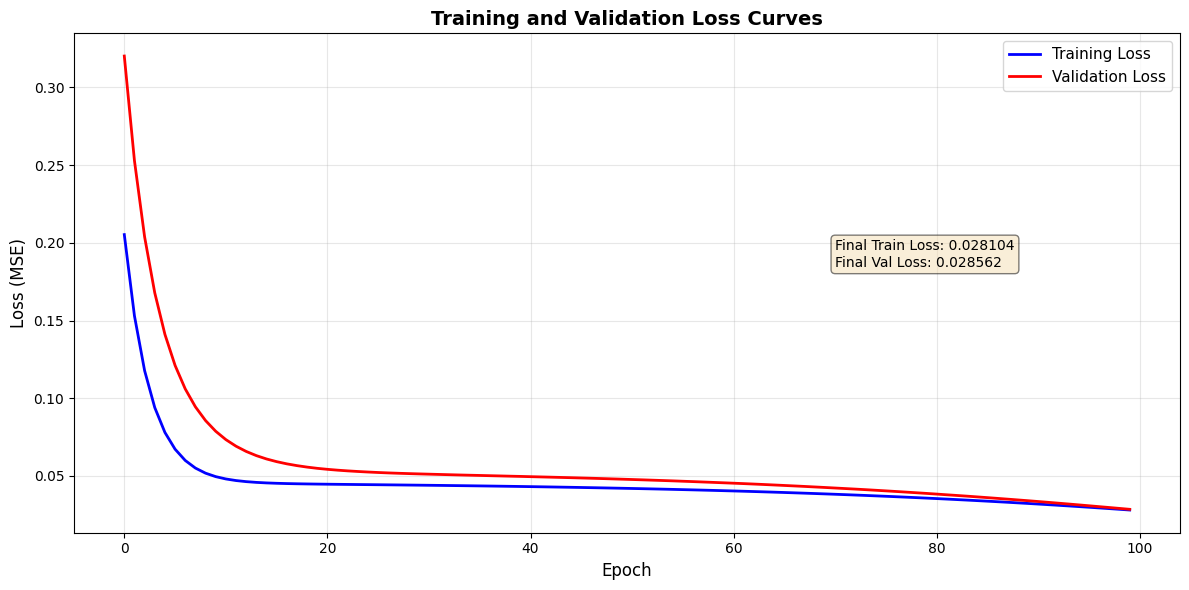

LOSS CURVES ANALYSIS

Initial Training Loss: 0.205307
Final Training Loss:   0.028104
Loss Reduction:        0.177203
Loss Reduction %:      86.31%

Initial Validation Loss: 0.320198
Final Validation Loss:   0.028562
Loss Reduction:          0.291636
Loss Reduction %:        91.08%

INTERPRETATION

✓ Model is learning! Training loss decreased.
✓ Good generalization! Train and val loss are close.


In [40]:
# Step 5: Visualize Training and Validation Loss Curves
# ============================================
# Plot training and validation loss over epochs
# ============================================

plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.plot(history['train_loss'], label='Training Loss', linewidth=2, color='blue')
plt.plot(history['val_loss'], label='Validation Loss', linewidth=2, color='red')

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('Training and Validation Loss Curves', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add annotations
final_train_loss = history['train_loss'][-1]
final_val_loss = history['val_loss'][-1]

plt.text(len(history['train_loss']) * 0.7, max(history['train_loss']) * 0.9,
         f'Final Train Loss: {final_train_loss:.6f}\nFinal Val Loss: {final_val_loss:.6f}',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         fontsize=10)

plt.tight_layout()
plt.show()

print("="*70)
print("LOSS CURVES ANALYSIS")
print("="*70)

print(f"\nInitial Training Loss: {history['train_loss'][0]:.6f}")
print(f"Final Training Loss:   {history['train_loss'][-1]:.6f}")
print(f"Loss Reduction:        {history['train_loss'][0] - history['train_loss'][-1]:.6f}")
print(f"Loss Reduction %:      {(history['train_loss'][0] - history['train_loss'][-1]) / history['train_loss'][0] * 100:.2f}%")

print(f"\nInitial Validation Loss: {history['val_loss'][0]:.6f}")
print(f"Final Validation Loss:   {history['val_loss'][-1]:.6f}")
print(f"Loss Reduction:          {history['val_loss'][0] - history['val_loss'][-1]:.6f}")
print(f"Loss Reduction %:        {(history['val_loss'][0] - history['val_loss'][-1]) / history['val_loss'][0] * 100:.2f}%")

print("\n" + "="*70)
print("INTERPRETATION")
print("="*70)

# Check if loss decreased
if history['train_loss'][-1] < history['train_loss'][0]:
    print("\n✓ Model is learning! Training loss decreased.")
else:
    print("\n⚠ Model might not be learning properly. Check hyperparameters.")

# Check for overfitting
train_val_gap = history['train_loss'][-1] - history['val_loss'][-1]
if abs(train_val_gap) < 0.01:
    print("✓ Good generalization! Train and val loss are close.")
elif history['train_loss'][-1] < history['val_loss'][-1]:
    print("⚠ Some overfitting detected (train loss < val loss).")
    print(f"  Gap: {abs(train_val_gap):.6f}")
else:
    print("? Unusual: Validation loss < Training loss (might need more training)")

print("="*70)


## Step 6: Test on Test Set

Let's evaluate our trained model on the test set (unseen data).


In [41]:
# Step 6: Test on Test Set
# ============================================
# Evaluate the trained model on test set (unseen data)
# ============================================

print("="*70)
print("TESTING ON TEST SET")
print("="*70)

# Reshape X_test if needed (same as training/validation)
# RNN expects: (seq_length, n_samples, features)
# create_sequences returns: (n_samples, seq_length, features)
if X_test.ndim == 3:
    if X_test.shape[1] < X_test.shape[0] and X_test.shape[1] <= 50:  # seq_length is usually small (< 50)
        # Shape is (n_samples, seq_length, features), transpose to (seq_length, n_samples, features)
        original_shape = X_test.shape
        X_test = np.transpose(X_test, (1, 0, 2))  # Explicit transpose
        print(f"Transposed X_test: {original_shape} → {X_test.shape}")

# Make predictions on test set
test_outputs, _ = rnn_model.forward(X_test)

# Handle output shape - test_outputs should be (seq_length, n_test, output_size) or (seq_length, output_size)
if test_outputs.ndim == 3:
    # Batch case: (seq_length, n_test, output_size)
    test_predictions = test_outputs[-1]  # (n_test, output_size)
elif test_outputs.ndim == 2:
    # Single sequence case: (seq_length, output_size)
    test_predictions = test_outputs[-1]  # (output_size,)
    # If y_test is 2D, we need to expand test_predictions
    if y_test.ndim == 2 and test_predictions.ndim == 1:
        test_predictions = test_predictions[np.newaxis, :]
else:
    # Should not happen, but handle it
    test_predictions = test_outputs[-1] if test_outputs.ndim > 0 else test_outputs

# Calculate test loss
test_loss = mse_loss(y_test, test_predictions)
test_rmse = np.sqrt(test_loss)

print(f"\nTest Set Metrics:")
print(f"  Test Loss (MSE): {test_loss:.6f}")
print(f"  Test RMSE:       {test_rmse:.6f}")

print("\n" + "="*70)
print("PER-FEATURE METRICS")
print("="*70)

# Calculate per-feature metrics
feature_names = ['RPM', 'Vehicle Speed']
print("\nPer-feature RMSE:")
for i, name in enumerate(feature_names):
    feature_mse = mse_loss(y_test[:, i], test_predictions[:, i])
    feature_rmse = np.sqrt(feature_mse)
    print(f"  {name:20s}: {feature_rmse:.6f}")

print("\n" + "="*70)
print("COMPARISON WITH TRAINING/VALIDATION")
print("="*70)

print(f"\nTraining Loss:   {history['train_loss'][-1]:.6f}")
print(f"Validation Loss: {history['val_loss'][-1]:.6f}")
print(f"Test Loss:       {test_loss:.6f}")

if test_loss < history['val_loss'][-1] * 1.1:
    print("\n✓ Good! Test loss is close to validation loss.")
    print("  Model generalizes well to unseen data!")
else:
    print("\n⚠ Test loss is higher than validation loss.")
    print("  Model might be overfitting to validation set.")

print("="*70)


TESTING ON TEST SET

Test Set Metrics:
  Test Loss (MSE): 0.045462
  Test RMSE:       0.213219

PER-FEATURE METRICS

Per-feature RMSE:
  RPM                 : 0.176278
  Vehicle Speed       : 0.244645

COMPARISON WITH TRAINING/VALIDATION

Training Loss:   0.028104
Validation Loss: 0.028562
Test Loss:       0.045462

⚠ Test loss is higher than validation loss.
  Model might be overfitting to validation set.


## Step 7: Visualize Predictions vs Actual Values

Let's visualize how well our model predicts the actual vehicle sensor values.


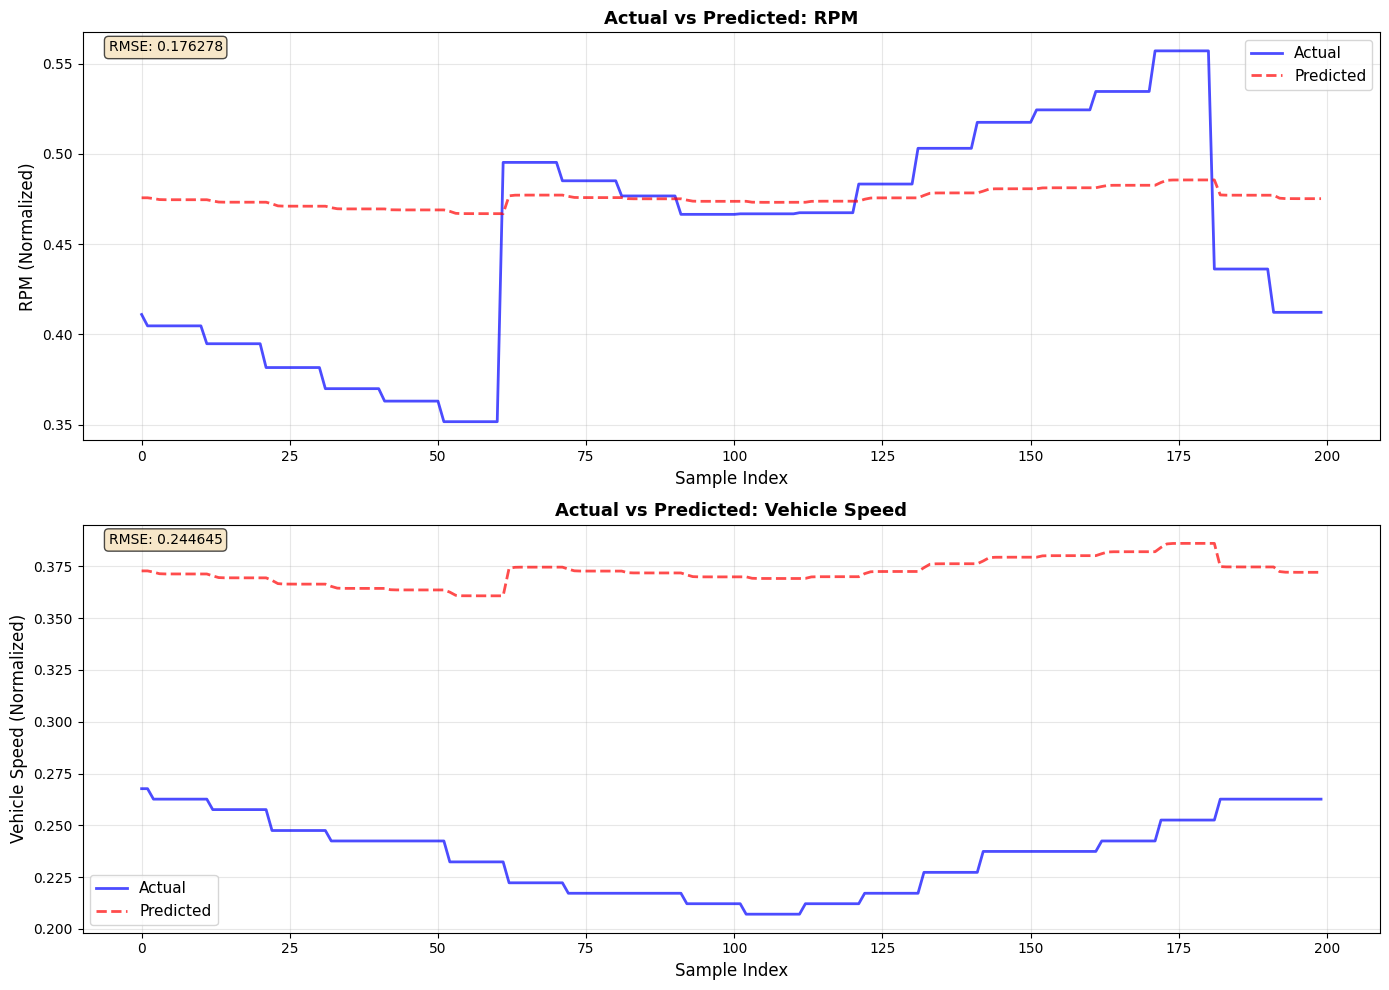

PREDICTION VISUALIZATION

Showing first 200 test samples:
  Blue line = Actual values
  Red dashed line = Predicted values

Closer match = Better predictions!

SUMMARY

✓ Complete Vanilla RNN implementation from scratch!

What we accomplished:
  1. ✓ Built VanillaRNN class with forward/backward methods
  2. ✓ Implemented full Backpropagation Through Time (BPTT)
  3. ✓ Added batching support
  4. ✓ Trained model on vehicle sensor data
  5. ✓ Validated on validation set
  6. ✓ Tested on test set (unseen data)
  7. ✓ Visualized training progress and predictions

✓ Implementation complete!


In [42]:
# Step 7: Visualize Predictions vs Actual Values
# ============================================
# Plot actual vs predicted values for test set
# ============================================

# Select number of samples to visualize
n_samples_plot = 200

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

feature_names = ['RPM', 'Vehicle Speed']

for i, (name, ax) in enumerate(zip(feature_names, axes)):
    # Plot actual and predicted values
    ax.plot(y_test[:n_samples_plot, i], label='Actual', linewidth=2, alpha=0.7, color='blue')
    ax.plot(test_predictions[:n_samples_plot, i], label='Predicted', linewidth=2, alpha=0.7, color='red', linestyle='--')
    
    ax.set_xlabel('Sample Index', fontsize=12)
    ax.set_ylabel(f'{name} (Normalized)', fontsize=12)
    ax.set_title(f'Actual vs Predicted: {name}', fontsize=13, fontweight='bold')
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)
    
    # Add RMSE annotation
    feature_rmse = np.sqrt(mse_loss(y_test[:, i], test_predictions[:, i]))
    ax.text(0.02, 0.98, f'RMSE: {feature_rmse:.6f}', 
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7),
            fontsize=10)

plt.tight_layout()
plt.show()

print("="*70)
print("PREDICTION VISUALIZATION")
print("="*70)

print(f"\nShowing first {n_samples_plot} test samples:")
print(f"  Blue line = Actual values")
print(f"  Red dashed line = Predicted values")
print(f"\nCloser match = Better predictions!")

print("\n" + "="*70)
print("SUMMARY")
print("="*70)

print("\n✓ Complete Vanilla RNN implementation from scratch!")
print("\nWhat we accomplished:")
print("  1. ✓ Built VanillaRNN class with forward/backward methods")
print("  2. ✓ Implemented full Backpropagation Through Time (BPTT)")
print("  3. ✓ Added batching support")
print("  4. ✓ Trained model on vehicle sensor data")
print("  5. ✓ Validated on validation set")
print("  6. ✓ Tested on test set (unseen data)")
print("  7. ✓ Visualized training progress and predictions")

print("\n✓ Implementation complete!")
print("="*70)
